## How **PCA** help you in fraud/anomaly detection?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, average_precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import collections

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

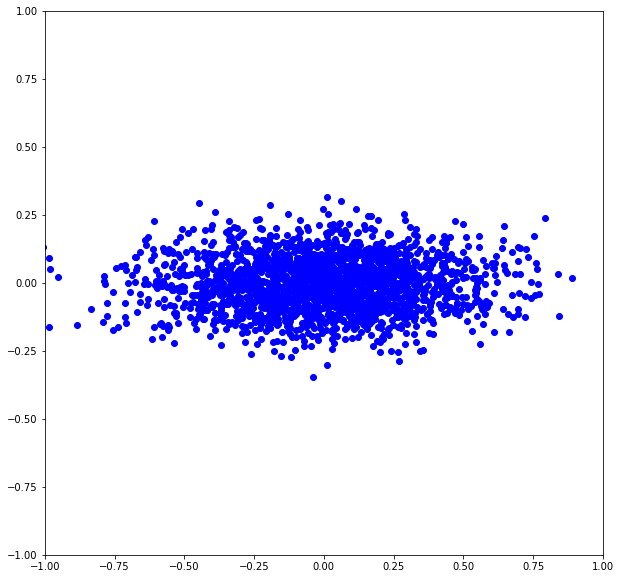

In [ ]:
# Generate data
import numpy as np
import matplotlib.pyplot as plt

notfraud_x = np.random.normal(0, 0.3, 2000)
notfraud_y = np.random.normal(0, 0.1, 2000)

plt.figure(figsize=(10,10))
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.scatter(notfraud_x, notfraud_y, color='blue')
plt.show()

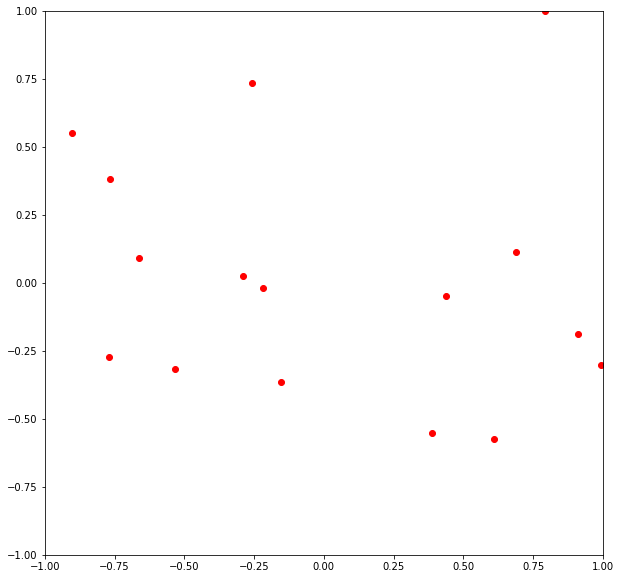

In [ ]:
fraud_x = np.random.normal(0.15, 0.7, 20)
fraud_y = np.random.normal(0.15, 0.5, 20)

plt.figure(figsize=(10,10))
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.scatter(fraud_x,fraud_y,color='red')
plt.show()

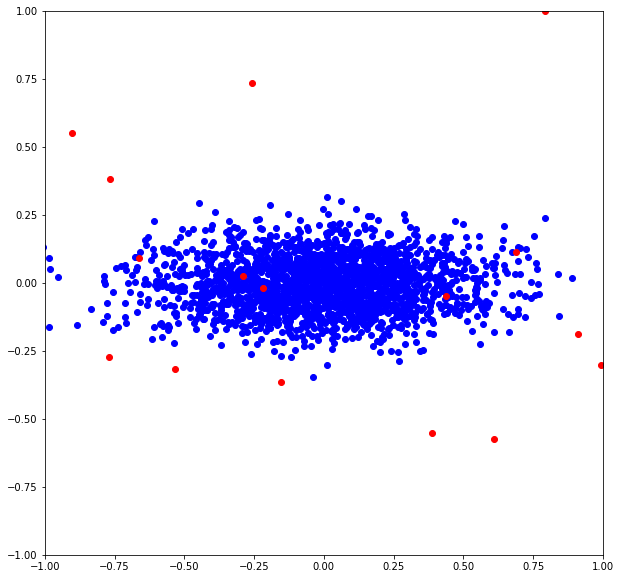

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.scatter(notfraud_x,notfraud_y,color='blue')
plt.scatter(fraud_x,fraud_y,color='red')
plt.show()

In [ ]:
X = np.concatenate((notfraud_x, fraud_x))
Y = np.concatenate((notfraud_y, fraud_y))

In [ ]:
df = pd.DataFrame({'X':X,'Y':Y})

In [ ]:
df.head()

,X,Y
0,-0.015958,-0.018480
1,-0.374520,0.048375
2,0.511391,-0.139478
3,0.742367,-0.054986
4,-0.070873,-0.232623


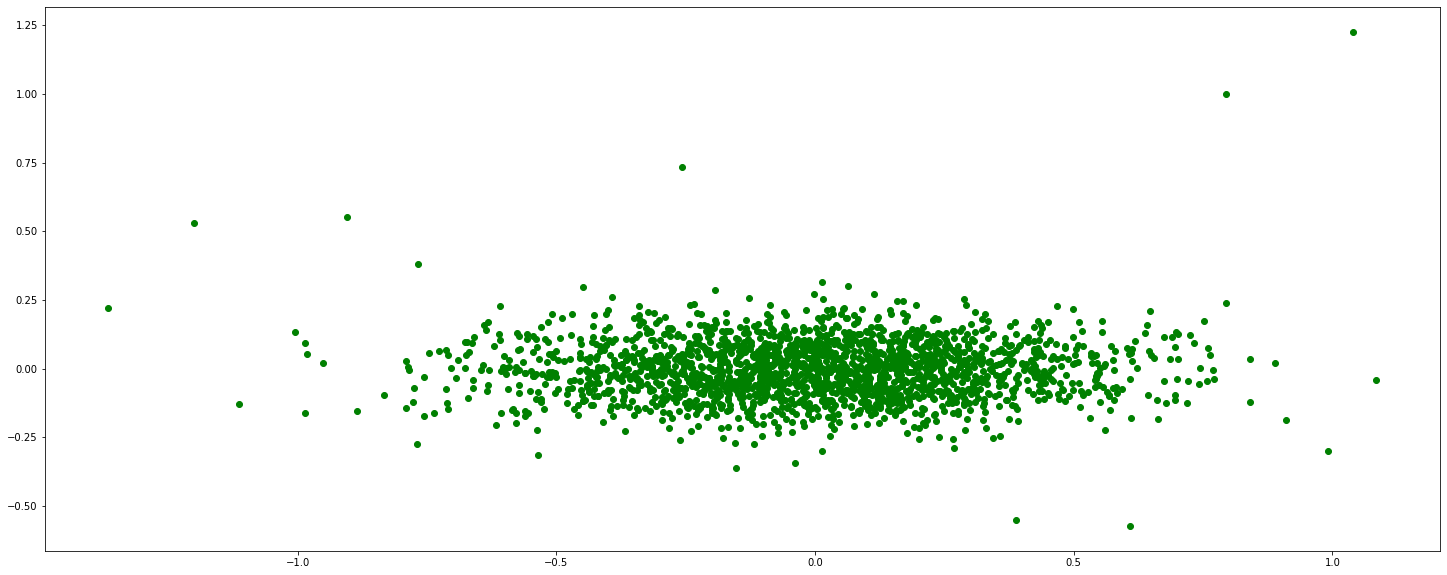

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(df.X,df.Y,color='green')
plt.show()

In [ ]:
pca = PCA(n_components=1)
pca

PCA(n_components=1)

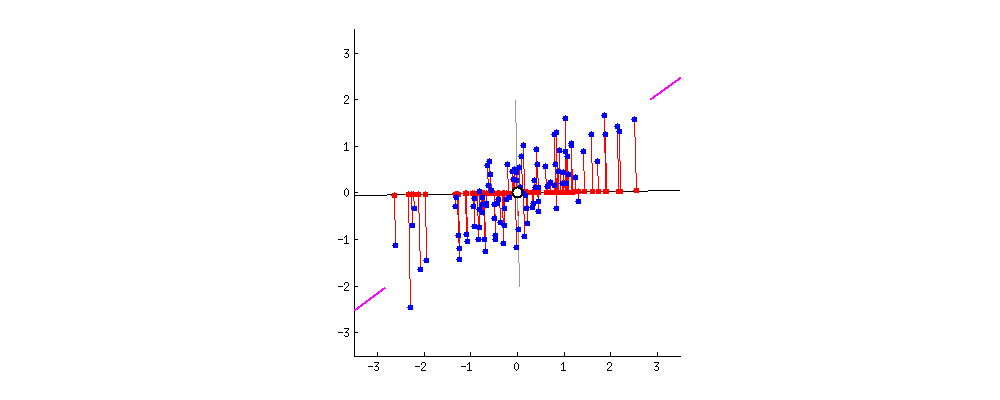

In [ ]:
pca.fit(df)

PCA(n_components=1)

In [ ]:
pp_transform = pca.transform(df) #project ข้อมูล ลงบนเส้น
pp_transform

array([[ 0.00810006],
       [ 0.3663623 ],
       [-0.51870899],
       ...,
       [-0.69812838],
       [ 0.14562087],
       [-0.91691566]])

In [ ]:
pp_inverse = pca.inverse_transform(pp_transform) #project กลับ
pp_inverse

array([[-0.01603415, -0.00135136],
       [-0.37429289, -0.00293558],
       [ 0.51076975,  0.00097817],
       ...,
       [ 0.69018739,  0.00177156],
       [-0.15355361, -0.00195947],
       [ 0.90897253,  0.00273903]])

แกน PCA
1. ระยะห่างจุดทุกจุดน้อยที่สุด (ชิดที่สุด)
2. Variance กว้างที่สุด

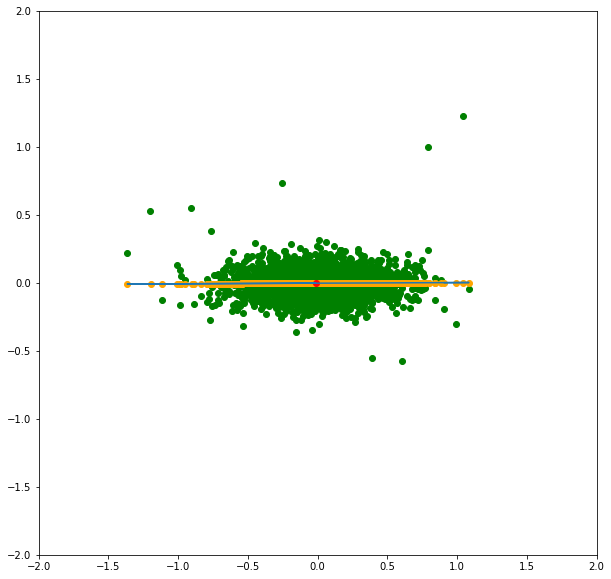

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df.X,df.Y,color='green')
plt.scatter(pp_inverse[:,0],pp_inverse[:,1],color='orange')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.plot(pp_inverse[:,0],pp_inverse[:,1])
plt.scatter(pca.mean_[0],pca.mean_[1],color='red')
plt.show()

In [ ]:
inversedata = pd.DataFrame({'X':pp_inverse[:,0],'Y':pp_inverse[:,1]}) 
inversedata

,X,Y
0,-0.016034,-0.001351
1,-0.374293,-0.002936
2,0.510770,0.000978
3,0.742115,0.002001
4,-0.071894,-0.001598
...,...,...
2015,-1.364866,-0.007316
2016,1.045750,0.003344
2017,0.690187,0.001772
2018,-0.153554,-0.001959


In [ ]:
import numpy as np
df['diffx'] = df['X'] - inversedata['X']
df['diffy'] = df['Y'] - inversedata['Y']
df['distance'] = np.hypot(df.diffx,df.diffy)
df

,X,Y,diffx,diffy,distance
0,-0.015958,-0.018480,0.000076,-0.017129,0.017129
1,-0.374520,0.048375,-0.000227,0.051310,0.051311
2,0.511391,-0.139478,0.000621,-0.140456,0.140457
3,0.742367,-0.054986,0.000252,-0.056987,0.056988
4,-0.070873,-0.232623,0.001022,-0.231025,0.231027
...,...,...,...,...,...
2015,-1.365875,0.220868,-0.001009,0.228184,0.228186
2016,1.040346,1.225452,-0.005404,1.222108,1.222120
2017,0.689692,0.113736,-0.000495,0.111965,0.111966
2018,-0.151957,-0.362962,0.001596,-0.361003,0.361006


In [ ]:
df["actual"] = np.concatenate((np.zeros(2000),np.ones(20)))
df.head()

,X,Y,diffx,diffy,distance,actual
0,-0.015958,-0.018480,0.000076,-0.017129,0.017129,0.0
1,-0.374520,0.048375,-0.000227,0.051310,0.051311,0.0
2,0.511391,-0.139478,0.000621,-0.140456,0.140457,0.0
3,0.742367,-0.054986,0.000252,-0.056987,0.056988,0.0
4,-0.070873,-0.232623,0.001022,-0.231025,0.231027,0.0


In [ ]:
df['distance']

0       0.017129
1       0.051311
2       0.140457
3       0.056988
4       0.231027
          ...   
2015    0.228186
2016    1.222120
2017    0.111966
2018    0.361006
2019    0.191288
Name: distance, Length: 2020, dtype: float64

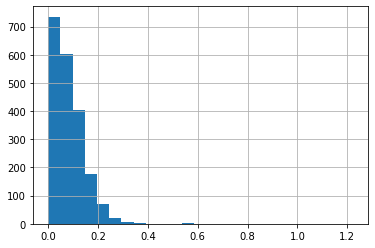

In [ ]:
df['distance'].hist(bins=25)

In [ ]:
df['actual'].value_counts(normalize=True)

0.0    0.990099
1.0    0.009901
Name: actual, dtype: float64

In [ ]:
threshold = df['distance'].quantile(0.99)
threshold

0.27096637303644405

In [ ]:
df['prediction'] = df['distance'].apply(lambda x: 1 if x > threshold else 0)
df['fraud'] = df['prediction'].map({0: 'notfraud', 1:'fraud'})
df

,X,Y,diffx,diffy,distance,actual,prediction,fraud
0,-0.015958,-0.018480,0.000076,-0.017129,0.017129,0.0,0,notfraud
1,-0.374520,0.048375,-0.000227,0.051310,0.051311,0.0,0,notfraud
2,0.511391,-0.139478,0.000621,-0.140456,0.140457,0.0,0,notfraud
3,0.742367,-0.054986,0.000252,-0.056987,0.056988,0.0,0,notfraud
4,-0.070873,-0.232623,0.001022,-0.231025,0.231027,0.0,0,notfraud
...,...,...,...,...,...,...,...,...
2015,-1.365875,0.220868,-0.001009,0.228184,0.228186,1.0,0,notfraud
2016,1.040346,1.225452,-0.005404,1.222108,1.222120,1.0,1,fraud
2017,0.689692,0.113736,-0.000495,0.111965,0.111966,1.0,0,notfraud
2018,-0.151957,-0.362962,0.001596,-0.361003,0.361006,1.0,1,fraud


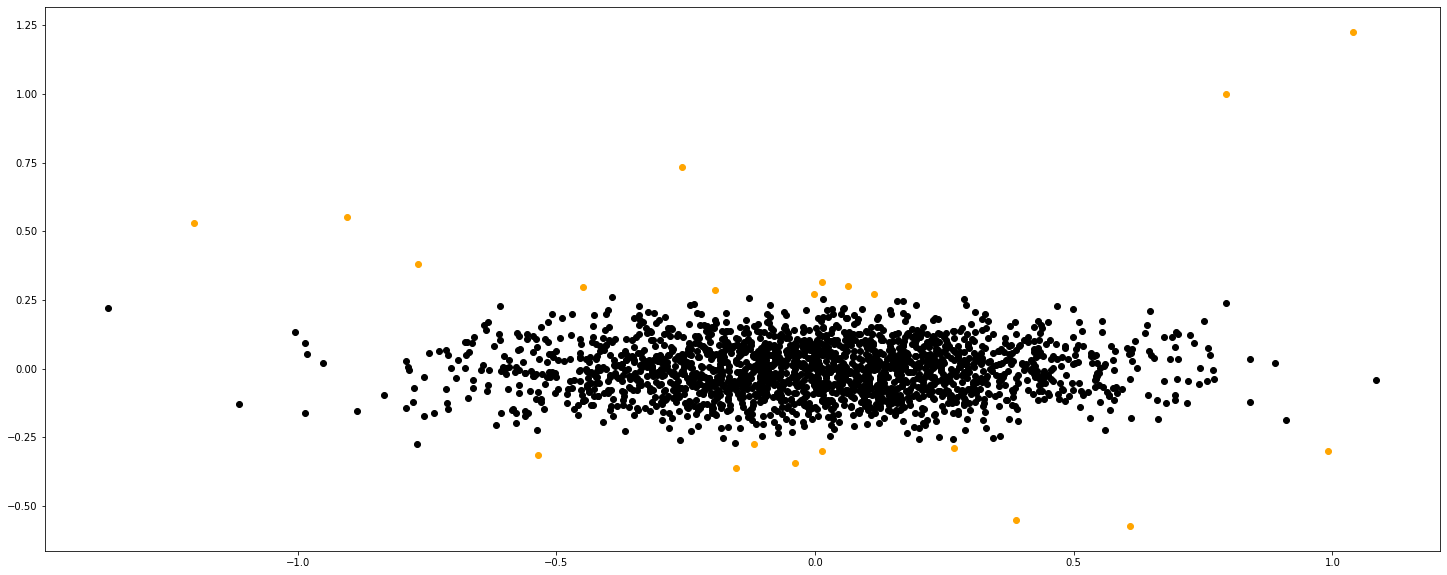

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(df.X[df['fraud']=='notfraud'],df.Y[df['fraud']=='notfraud'],color='Black')
plt.scatter(df.X[df['fraud']=='fraud'],df.Y[df['fraud']=='fraud'],color='orange')
# plt.scatter(fraud_x,fraud_y,color='red')
# plt.plot(component.Xnew,component.Ynew,color='green')
plt.show()

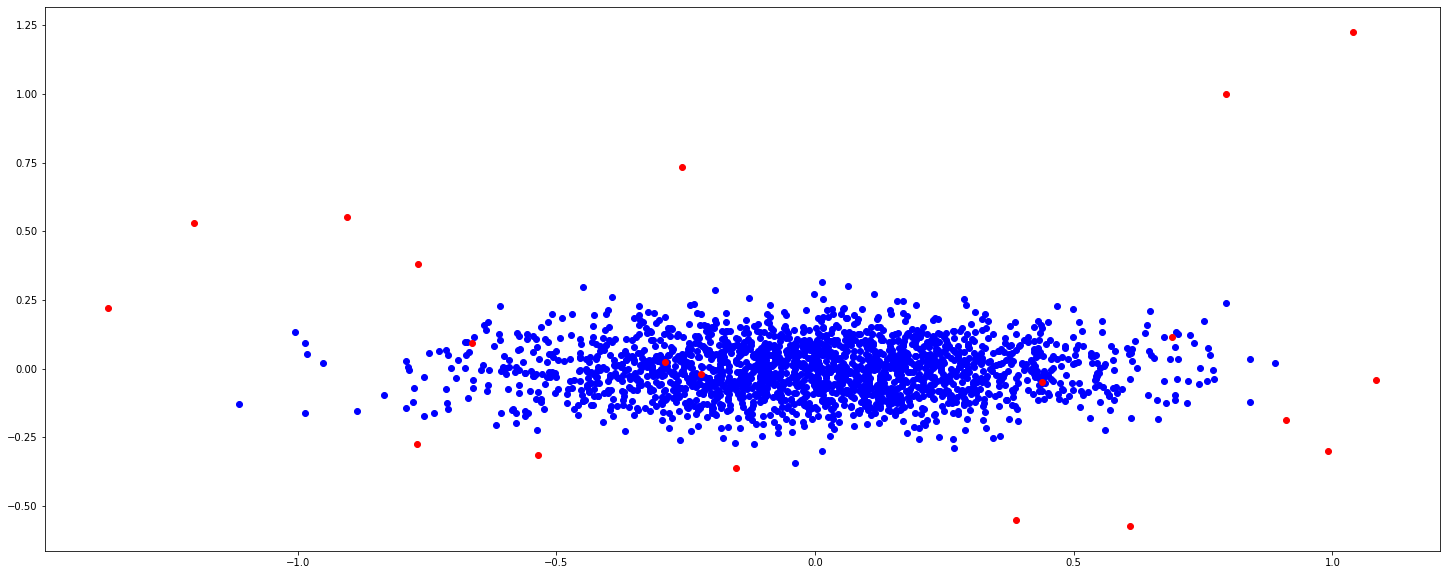

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(notfraud_x,notfraud_y,color='blue')
plt.scatter(fraud_x,fraud_y,color='red')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df["actual"], df["prediction"])
tn, fp, fn, tp = confusion_matrix(df["actual"], df["prediction"]).ravel()
(tn, fp, fn, tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*(precision *recall)/(precision + recall)
print("precision", precision)
print("recall", recall)
print("f1", f1)

precision 0.5238095238095238
recall 0.55
f1 0.5365853658536585


In [ ]:
print(classification_report(df['actual'], df['fraud'].map({'notfraud':0, 'fraud':1})))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2000
         1.0       0.52      0.55      0.54        20

    accuracy                           0.99      2020
   macro avg       0.76      0.77      0.77      2020
weighted avg       0.99      0.99      0.99      2020



## How **KMeans** help you in fraud/anomaly detection?

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.DataFrame({'X': X, 'Y': Y})
df

,X,Y
0,-0.015958,-0.018480
1,-0.374520,0.048375
2,0.511391,-0.139478
3,0.742367,-0.054986
4,-0.070873,-0.232623
...,...,...
2015,-1.365875,0.220868
2016,1.040346,1.225452
2017,0.689692,0.113736
2018,-0.151957,-0.362962


In [ ]:
df["actual"] = np.concatenate((np.zeros(2000),np.ones(20)))

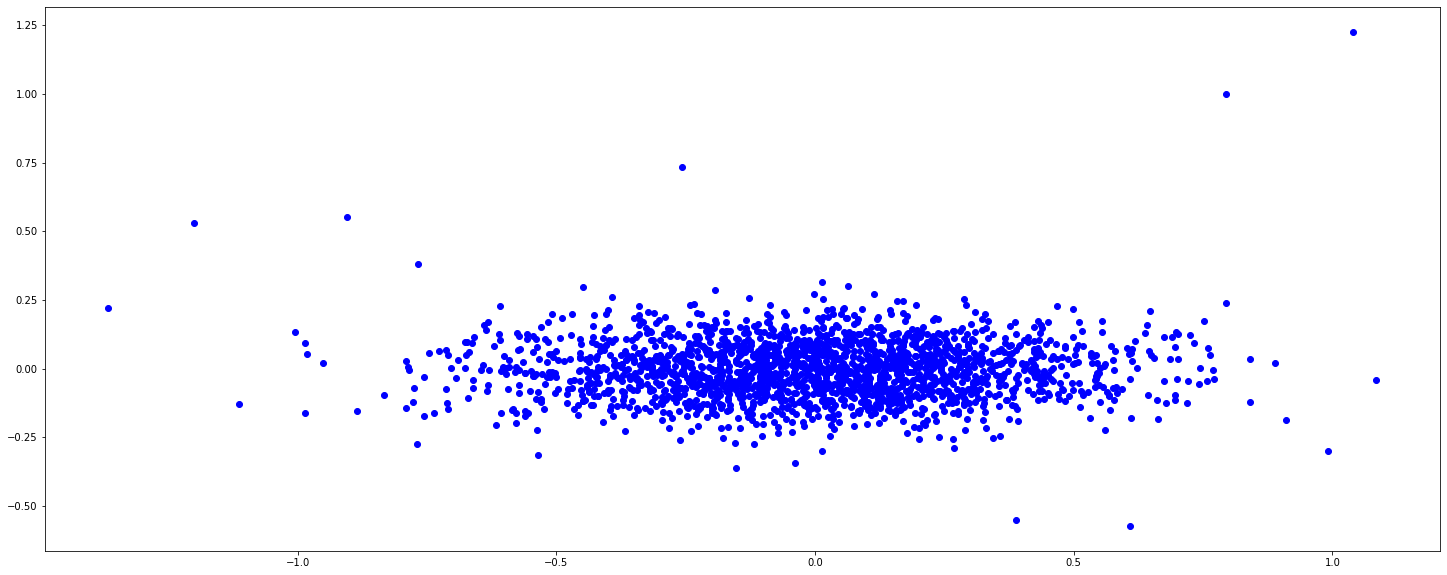

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(df.X,df.Y,color='blue')
plt.show()

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters=4)

#predict the labels of clusters.
group = kmeans.fit_predict(df)
 
print(group)

[0 2 1 ... 1 0 1]


In [ ]:
df['group'] = group 
df

,X,Y,actual,group
0,-0.015958,-0.018480,0.0,0
1,-0.374520,0.048375,0.0,2
2,0.511391,-0.139478,0.0,1
3,0.742367,-0.054986,0.0,1
4,-0.070873,-0.232623,0.0,0
...,...,...,...,...
2015,-1.365875,0.220868,1.0,2
2016,1.040346,1.225452,1.0,1
2017,0.689692,0.113736,1.0,1
2018,-0.151957,-0.362962,1.0,0


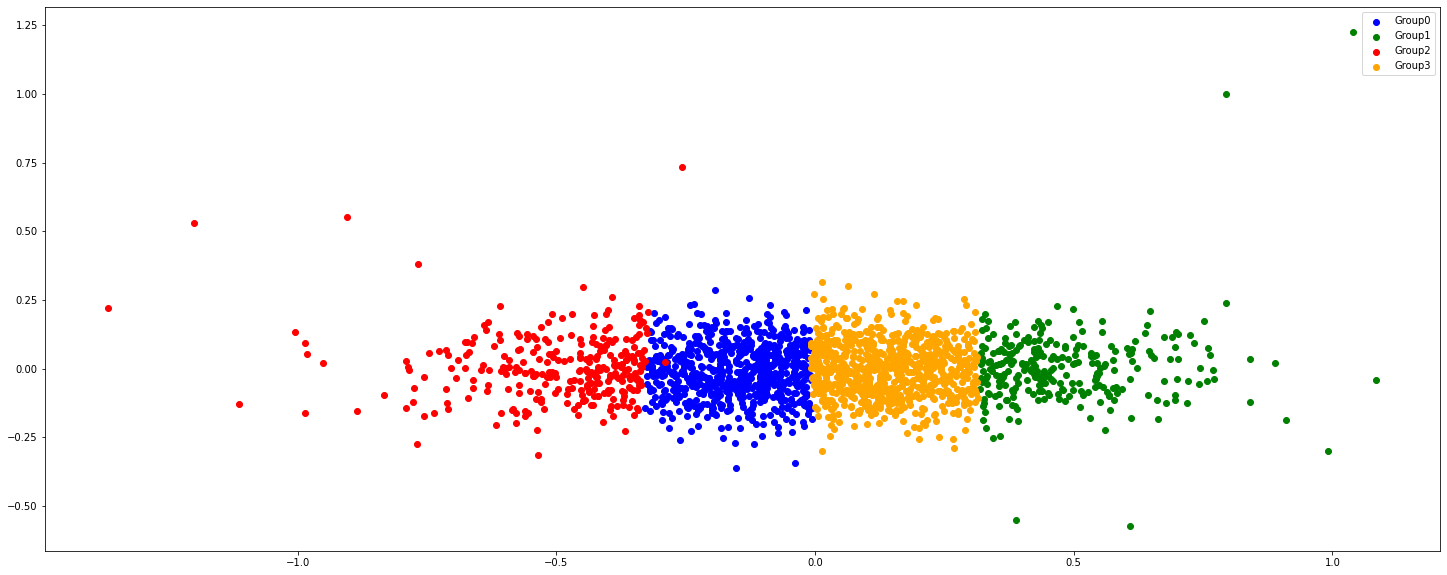

In [ ]:
#plotting the results
plt.figure(figsize=(25,10))
plt.scatter(df.X[df['group'] == 0],df.Y[df['group'] == 0],color='blue',label='Group0')
plt.scatter(df.X[df['group'] == 1],df.Y[df['group'] == 1],color='green',label='Group1')
plt.scatter(df.X[df['group'] == 2],df.Y[df['group'] == 2],color='red',label='Group2')
plt.scatter(df.X[df['group'] == 3],df.Y[df['group'] == 3],color='orange',label='Group3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='black', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
centroid_df = pd.DataFrame({'centroidX':kmeans.cluster_centers_[:, 0] , 'centroidY': kmeans.cluster_centers_[:, 1], 'group':range(0,4)})
centroid_df

,centroidX,centroidY,group
0,-0.154905,-0.007387,0
1,0.486007,0.003846,1
2,-0.498723,0.005414,2
3,0.140780,-0.000153,3


In [ ]:
df = df.merge(centroid_df,how='left',on='group')
df

,X,Y,actual,group,centroidX,centroidY
0,-0.015958,-0.018480,0.0,0,-0.154905,-0.007387
1,-0.374520,0.048375,0.0,2,-0.498723,0.005414
2,0.511391,-0.139478,0.0,1,0.486007,0.003846
3,0.742367,-0.054986,0.0,1,0.486007,0.003846
4,-0.070873,-0.232623,0.0,0,-0.154905,-0.007387
...,...,...,...,...,...,...
2015,-1.365875,0.220868,1.0,2,-0.498723,0.005414
2016,1.040346,1.225452,1.0,1,0.486007,0.003846
2017,0.689692,0.113736,1.0,1,0.486007,0.003846
2018,-0.151957,-0.362962,1.0,0,-0.154905,-0.007387


In [ ]:
df

,X,Y,actual,group,centroidX,centroidY
0,-0.015958,-0.018480,0.0,0,-0.154905,-0.007387
1,-0.374520,0.048375,0.0,2,-0.498723,0.005414
2,0.511391,-0.139478,0.0,1,0.486007,0.003846
3,0.742367,-0.054986,0.0,1,0.486007,0.003846
4,-0.070873,-0.232623,0.0,0,-0.154905,-0.007387
...,...,...,...,...,...,...
2015,-1.365875,0.220868,1.0,2,-0.498723,0.005414
2016,1.040346,1.225452,1.0,1,0.486007,0.003846
2017,0.689692,0.113736,1.0,1,0.486007,0.003846
2018,-0.151957,-0.362962,1.0,0,-0.154905,-0.007387


In [ ]:
df['diffX'] = df.X-df.centroidX
df['diffY'] = df.Y-df.centroidY
df['distance'] = np.hypot(df.diffX,df.diffY)
df

,X,Y,actual,group,centroidX,centroidY,diffX,diffY,distance
0,-0.015958,-0.018480,0.0,0,-0.154905,-0.007387,0.138946,-0.011093,0.139388
1,-0.374520,0.048375,0.0,2,-0.498723,0.005414,0.124204,0.042961,0.131424
2,0.511391,-0.139478,0.0,1,0.486007,0.003846,0.025384,-0.143324,0.145554
3,0.742367,-0.054986,0.0,1,0.486007,0.003846,0.256360,-0.058832,0.263024
4,-0.070873,-0.232623,0.0,0,-0.154905,-0.007387,0.084032,-0.225236,0.240401
...,...,...,...,...,...,...,...,...,...
2015,-1.365875,0.220868,1.0,2,-0.498723,0.005414,-0.867151,0.215454,0.893517
2016,1.040346,1.225452,1.0,1,0.486007,0.003846,0.554340,1.221606,1.341497
2017,0.689692,0.113736,1.0,1,0.486007,0.003846,0.203686,0.109890,0.231438
2018,-0.151957,-0.362962,1.0,0,-0.154905,-0.007387,0.002947,-0.355575,0.355587


In [ ]:
threshold = 0.99

In [ ]:
thresholdvalue0 = df.loc[df.group == 0]['distance'].quantile(threshold)
thresholdvalue1 = df.loc[df.group == 1]['distance'].quantile(threshold)
thresholdvalue2 = df.loc[df.group == 2]['distance'].quantile(threshold)
thresholdvalue3 = df.loc[df.group == 3]['distance'].quantile(threshold)

In [ ]:
df['fraud'] = '"'

In [ ]:
df.fraud[df['group']== 0] = df['distance'][df['group']== 0].apply(lambda x: 'fraud' if x > thresholdvalue0 else 'notfraud')
df.fraud[df['group']== 1] = df['distance'][df['group']== 1].apply(lambda x: 'fraud' if x > thresholdvalue1 else 'notfraud')
df.fraud[df['group']== 2] = df['distance'][df['group']== 2].apply(lambda x: 'fraud' if x > thresholdvalue2 else 'notfraud')
df.fraud[df['group']== 3] = df['distance'][df['group']== 3].apply(lambda x: 'fraud' if x > thresholdvalue3 else 'notfraud')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df

,X,Y,actual,group,centroidX,centroidY,diffX,diffY,distance,fraud
0,-0.015958,-0.018480,0.0,0,-0.154905,-0.007387,0.138946,-0.011093,0.139388,notfraud
1,-0.374520,0.048375,0.0,2,-0.498723,0.005414,0.124204,0.042961,0.131424,notfraud
2,0.511391,-0.139478,0.0,1,0.486007,0.003846,0.025384,-0.143324,0.145554,notfraud
3,0.742367,-0.054986,0.0,1,0.486007,0.003846,0.256360,-0.058832,0.263024,notfraud
4,-0.070873,-0.232623,0.0,0,-0.154905,-0.007387,0.084032,-0.225236,0.240401,notfraud
...,...,...,...,...,...,...,...,...,...,...
2015,-1.365875,0.220868,1.0,2,-0.498723,0.005414,-0.867151,0.215454,0.893517,fraud
2016,1.040346,1.225452,1.0,1,0.486007,0.003846,0.554340,1.221606,1.341497,fraud
2017,0.689692,0.113736,1.0,1,0.486007,0.003846,0.203686,0.109890,0.231438,notfraud
2018,-0.151957,-0.362962,1.0,0,-0.154905,-0.007387,0.002947,-0.355575,0.355587,fraud


In [ ]:
df_fraud = df[df['fraud']=='fraud']
df_notfraud = df[df['fraud']=='notfraud']

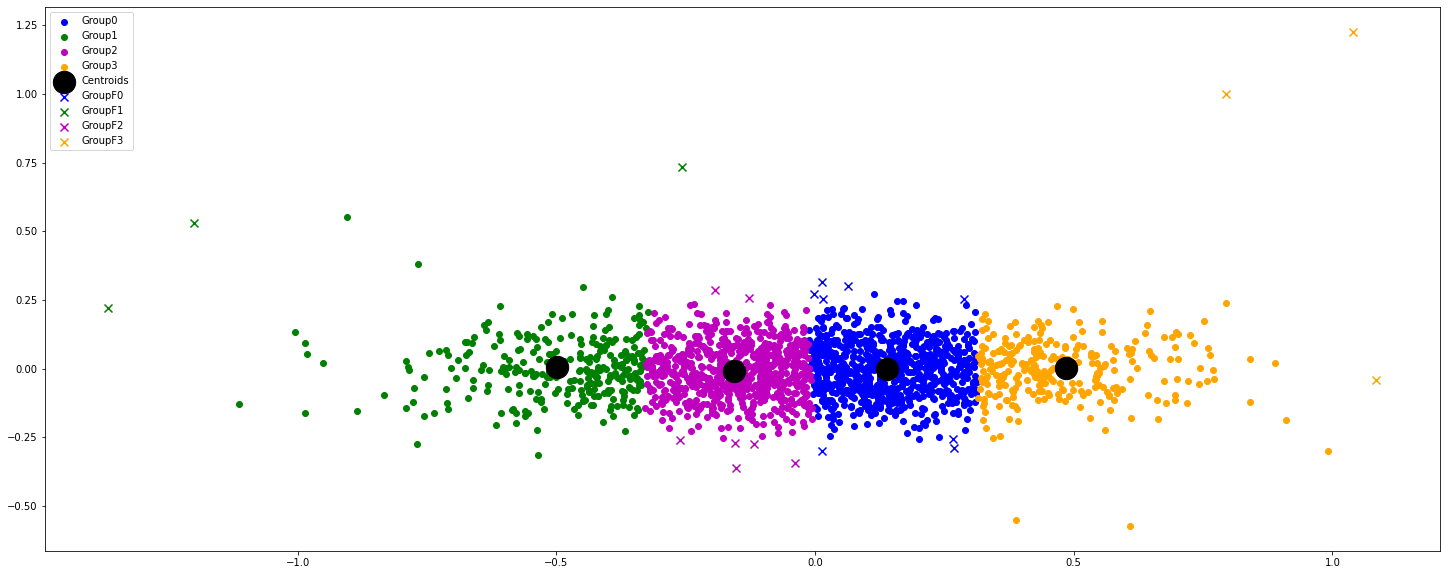

In [ ]:
#plotting the results
plt.figure(figsize=(25,10))
plt.scatter(df_notfraud.X[df['group'] == 0],df_notfraud.Y[df['group'] == 0],color='blue',label='Group0')
plt.scatter(df_notfraud.X[df['group'] == 1],df_notfraud.Y[df['group'] == 1],color='green',label='Group1')
plt.scatter(df_notfraud.X[df['group'] == 2],df_notfraud.Y[df['group'] == 2],color='m',label='Group2')
plt.scatter(df_notfraud.X[df['group'] == 3],df_notfraud.Y[df['group'] == 3],color='orange',label='Group3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='black', label = 'Centroids')

plt.scatter(df_fraud.X[df['group'] == 0],df_fraud.Y[df['group'] == 0],color='blue',label='GroupF0', marker='x', s=64)
plt.scatter(df_fraud.X[df['group'] == 1],df_fraud.Y[df['group'] == 1],color='green',label='GroupF1', marker='x', s=64)
plt.scatter(df_fraud.X[df['group'] == 2],df_fraud.Y[df['group'] == 2],color='m',label='GroupF2', marker='x', s=64)
plt.scatter(df_fraud.X[df['group'] == 3],df_fraud.Y[df['group'] == 3],color='orange',label='GroupF3', marker='x', s=64)

# plt.scatter(df_fraud.X,df_fraud.Y,color='Pink',label='Fraud')
plt.legend()
plt.show()

In [ ]:
print(classification_report(df['actual'], df['fraud'].map({'notfraud':0, 'fraud':1})))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2000
         1.0       0.33      0.35      0.34        20

    accuracy                           0.99      2020
   macro avg       0.66      0.67      0.67      2020
weighted avg       0.99      0.99      0.99      2020



# How **Autoencoder** help you in fraud/anomaly detection?

In [ ]:
df = pd.DataFrame({'X': X, 'Y': Y})
df

,X,Y
0,-0.015958,-0.018480
1,-0.374520,0.048375
2,0.511391,-0.139478
3,0.742367,-0.054986
4,-0.070873,-0.232623
...,...,...
2015,-1.365875,0.220868
2016,1.040346,1.225452
2017,0.689692,0.113736
2018,-0.151957,-0.362962


In [ ]:
# input
inp = Input(shape=(2))

# Encoder
x = Dense(7, activation='relu')(inp)
x = Dense(4, activation='relu')(x)

# Decoder

x = Dense(4, activation='tanh')(x)
x = Dense(7, activation='tanh')(x)

## output
output = Dense(2, activation='tanh')(x)

autoencoder = Model(inp, output)

lr = 0.0001
epochs = 300
adam = Adam(lr=lr, decay=(lr/epochs))

autoencoder.compile(optimizer=adam, loss="mean_squared_error")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_10 (Dense)            (None, 7)                 21        
                                                                 
 dense_11 (Dense)            (None, 4)                 32        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 7)                 35        
                                                                 
 dense_14 (Dense)            (None, 2)                 16        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable param

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = autoencoder.fit(df.values, df.values , epochs=epochs,shuffle=True, verbose=0)

Text(0.5, 1.0, 'Training and validation loss')

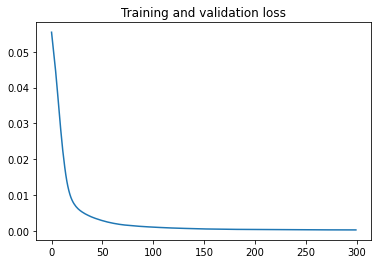

In [ ]:
loss = history.history['loss']

ts = range(epochs)

plt.plot(ts, loss)
plt.title('Training and validation loss')

In [ ]:
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.add(autoencoder.layers[1])
encoder.add(autoencoder.layers[2])

decoder = Sequential()
decoder.add(autoencoder.layers[3])
decoder.add(autoencoder.layers[4])
decoder.add(autoencoder.layers[5])

In [ ]:
X_tt = encoder.predict(df)
X_dt = decoder.predict(X_tt)
X_dt = pd.DataFrame(X_dt, columns=df.columns, index=df.index)

In [ ]:
X_dt

,X,Y
0,-0.015018,-0.020574
1,-0.377067,0.049178
2,0.499867,-0.136145
3,0.748624,-0.045243
4,-0.073122,-0.237047
...,...,...
2015,-0.950900,0.191778
2016,0.819854,0.744428
2017,0.705467,0.114171
2018,-0.181080,-0.313436


In [ ]:
df['MSE'] = MSE(df,X_dt)

In [ ]:
df

,X,Y,MSE
0,-0.015958,-0.018480,0.000003
1,-0.374520,0.048375,0.000004
2,0.511391,-0.139478,0.000072
3,0.742367,-0.054986,0.000067
4,-0.070873,-0.232623,0.000012
...,...,...,...
2015,-1.365875,0.220868,0.086525
2016,1.040346,1.225452,0.140000
2017,0.689692,0.113736,0.000125
2018,-0.151957,-0.362962,0.001650


In [ ]:
threshold = df.MSE.quantile(0.99)
threshold

0.0006648684525862331

In [ ]:
df['fraud'] = df['MSE'].apply(lambda x: 'fraud' if x > threshold else 'notfraud')
df["actual"] = np.concatenate((np.zeros(2000),np.ones(20)))
df

,X,Y,MSE,fraud,actual
0,-0.015958,-0.018480,0.000003,notfraud,0.0
1,-0.374520,0.048375,0.000004,notfraud,0.0
2,0.511391,-0.139478,0.000072,notfraud,0.0
3,0.742367,-0.054986,0.000067,notfraud,0.0
4,-0.070873,-0.232623,0.000012,notfraud,0.0
...,...,...,...,...,...
2015,-1.365875,0.220868,0.086525,fraud,1.0
2016,1.040346,1.225452,0.140000,fraud,1.0
2017,0.689692,0.113736,0.000125,notfraud,1.0
2018,-0.151957,-0.362962,0.001650,fraud,1.0


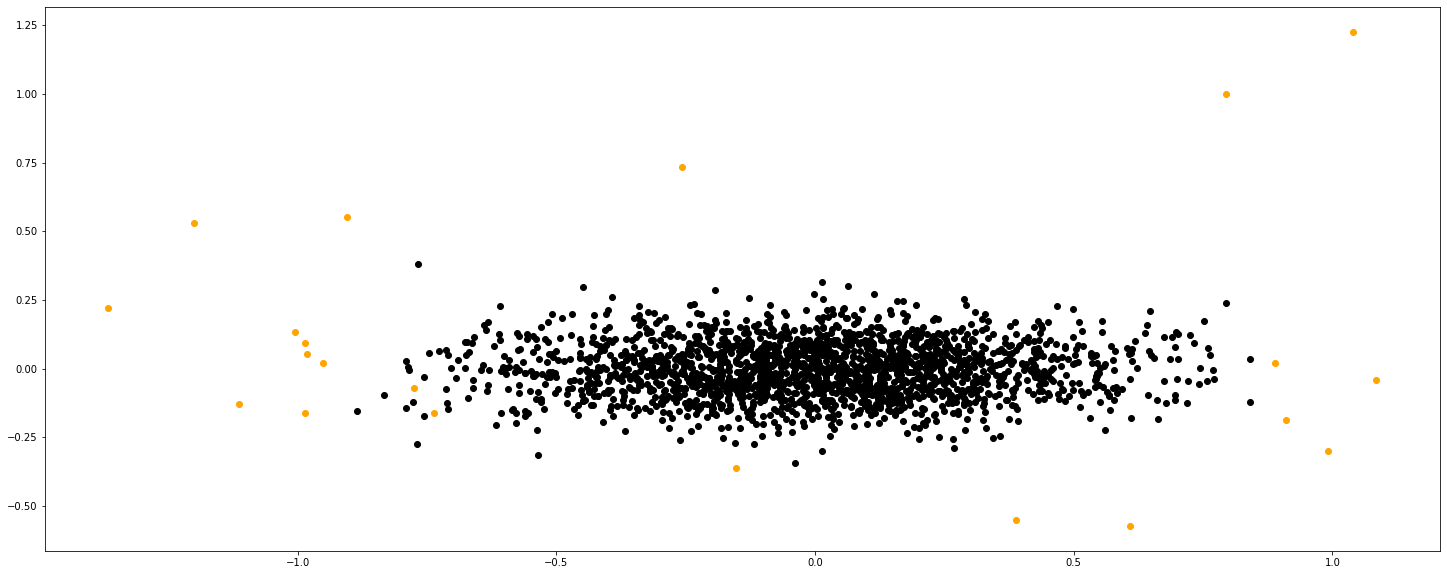

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(df.X[df['fraud']=='notfraud'],df.Y[df['fraud']=='notfraud'],color='Black')
plt.scatter(df.X[df['fraud']=='fraud'],df.Y[df['fraud']=='fraud'],color='orange')
# plt.scatter(fraud_x,fraud_y,color='red')
# plt.plot(component.Xnew,component.Ynew,color='green')
plt.show()

In [ ]:
print(classification_report(df['actual'], df['fraud'].map({'notfraud':0, 'fraud':1})))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2000
         1.0       0.57      0.60      0.59        20

    accuracy                           0.99      2020
   macro avg       0.78      0.80      0.79      2020
weighted avg       0.99      0.99      0.99      2020



# Prepare External Data



Download Data to Google Colab

In [ ]:
!gdown --id 1ui8zc24lIfc-MHXB7NN7hE54-ULz97SL

Downloading...
From: https://drive.google.com/uc?id=1ui8zc24lIfc-MHXB7NN7hE54-ULz97SL
To: /content/creditcardfraud.zip
69.2MB [00:00, 190MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((227845, 30), (56962, 30))

In [ ]:
n_components = 10
pca = PCA(n_components=n_components)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_tt = pca.transform(X_train)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X_train.columns, index=X_train.index)

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,0.319897,0.584204,-0.251486,0.062302,0.013795,0.684356,-0.906442,0.739436,0.043943,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,0.521818,0.373473,-0.533295,-0.401809,0.771781,-1.879937,1.241541,-2.623211,-1.241768,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,-0.305690,0.445453,-0.547450,0.166727,-0.073930,-0.796913,0.404795,-1.033061,-0.500426,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42
13766,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,1.708922,-1.666023,2.119731,1.799882,-0.357245,0.705997,-0.247970,0.483059,0.278512,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89


In [ ]:
X_dt

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161918.999992,1.946263,-0.843864,-1.539636,-0.683401,1.473728,4.052108,-1.273209,1.045648,1.347719,0.316018,-0.319502,0.169687,-0.086523,-0.162523,-0.215870,0.019462,-0.095793,0.051030,0.069694,-0.244158,-0.016215,0.165236,0.102235,-0.022721,-0.129027,-0.021322,-0.012410,-0.007459,7.319274
180305,124477.000009,2.036886,0.060254,-2.831561,0.275512,2.959542,3.267768,-0.234551,0.766462,0.106057,-0.010324,0.425475,-0.177332,0.109848,0.152983,0.175856,0.001540,0.075646,-0.106106,0.032206,-0.040419,-0.055491,-0.053360,0.001477,0.004164,0.067765,0.013197,-0.004218,-0.000987,2.990895
42664,41191.000014,-1.054962,0.555080,0.945083,-0.885371,-1.063030,2.092682,-2.032350,-5.104054,-0.199883,-0.206410,0.173343,-0.081439,0.037035,0.058823,0.141255,-0.040724,0.046445,-0.034516,-0.074746,0.157922,0.020768,-0.136907,-0.078416,0.020604,0.085691,0.020557,0.007489,0.004484,175.099921
198723,132624.000003,2.319417,-1.351489,-0.627241,-1.693763,-1.236738,-0.458472,-1.799564,0.176492,-0.934062,0.121212,-0.243056,0.115263,-0.076023,-0.122530,-0.138334,0.000231,-0.056458,0.051175,0.026338,-0.206389,-0.034936,0.117824,0.067800,-0.010375,-0.074025,-0.011621,-0.008228,-0.003528,6.101058
82325,59359.000019,-0.480106,-0.916247,0.502544,-3.385557,0.617258,-0.130739,0.317577,-0.058566,-0.053639,-0.107676,0.472581,-0.215534,0.118809,0.159710,0.266253,-0.023339,0.092698,-0.111131,-0.022521,0.037435,-0.036651,-0.142981,-0.042728,0.009619,0.148776,0.024095,0.003135,0.007999,86.100966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147709.999999,1.999850,-0.514828,-0.655333,0.118524,-0.262559,0.384160,-0.805198,0.223405,0.995936,0.233573,-0.374430,0.187344,-0.106444,-0.174782,-0.221195,0.015341,-0.097654,0.077994,0.043939,-0.202145,0.002794,0.155354,0.086185,-0.017946,-0.130855,-0.022949,-0.009365,-0.005888,5.990047
85418,60763.999990,-1.436956,0.735796,1.450485,-0.100366,0.774688,1.203320,0.476201,0.155111,0.502119,0.020656,0.045075,-0.019708,0.018296,0.015810,0.044625,-0.004623,0.011699,-0.032087,0.006900,-0.014391,-0.014098,-0.035850,-0.000479,0.001302,0.052073,0.008192,-0.001773,0.002055,36.990557
29062,35301.000007,1.074738,0.169216,0.688891,1.526366,-0.367540,-0.396458,-0.083747,0.034160,0.345591,-0.009771,0.323448,-0.153247,0.080693,0.117798,0.220651,-0.012721,0.080969,-0.102323,-0.023019,0.023184,-0.048906,-0.129142,-0.030782,0.012561,0.159665,0.026761,0.000007,0.003821,45.420837
13766,24412.999980,1.347253,0.284908,-0.077770,0.402575,0.273440,-0.212591,0.040991,-0.171052,1.044371,-0.028459,0.689191,-0.313077,0.169487,0.236083,0.415943,-0.020370,0.148334,-0.191183,-0.029527,0.010515,-0.082687,-0.221350,-0.046023,0.018873,0.259428,0.042507,-0.000456,0.006558,0.889983


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib
import matplotlib.style as style
from matplotlib import pylab as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, classification_report

from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.Class.unique()

array([0, 1])

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Explore Raw Data 



In [ ]:
X = df.iloc[:, 0:30]
Y = df.iloc[:, 30]

## Univariate Analysis

In [ ]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


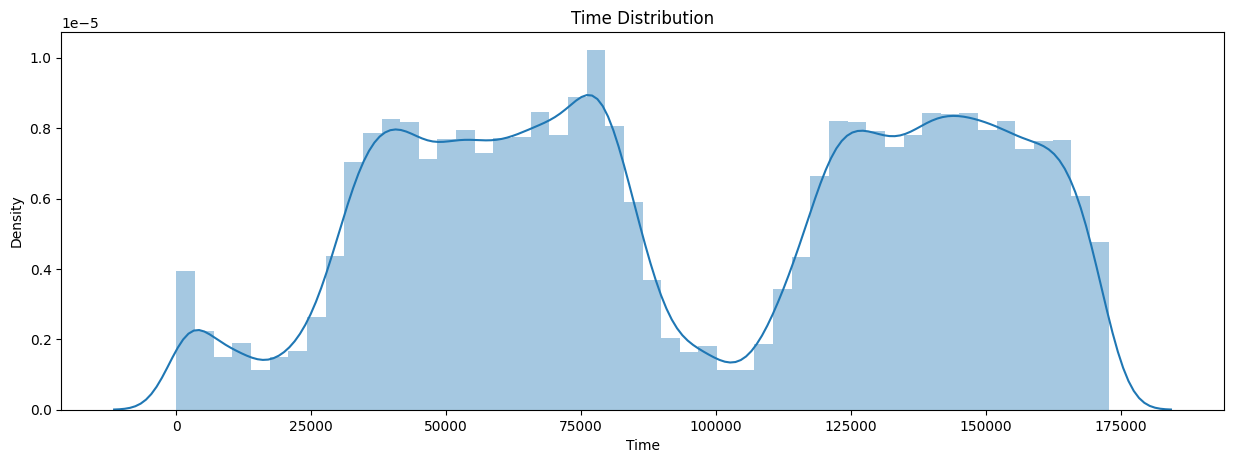

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Time Distribution')
sns.distplot(df.Time)

In [ ]:
df['Amount'].dtypes

dtype('float64')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


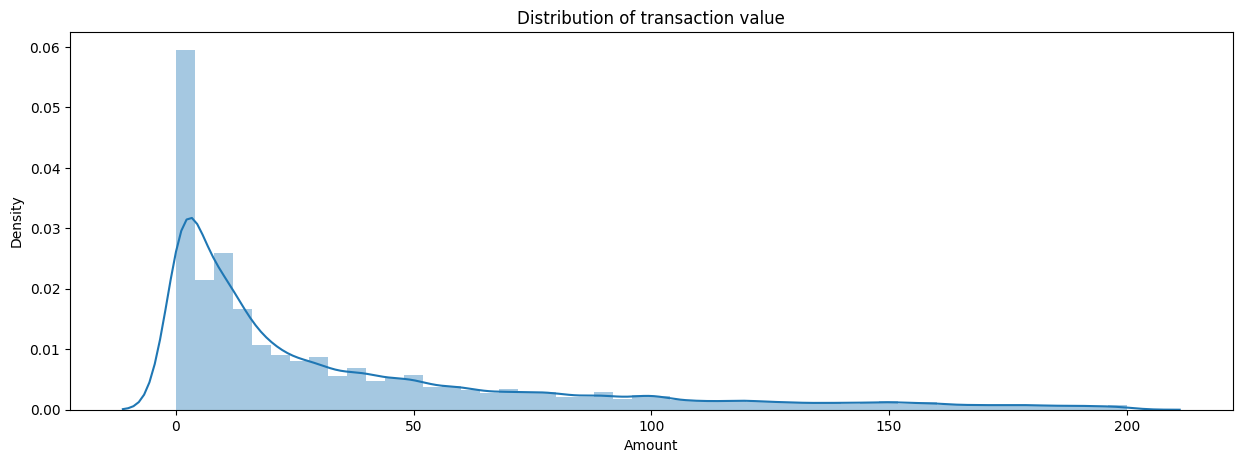

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of transaction value')
# sns.distplot(df.Amount)
sns.distplot(df[df['Amount']< 200]['Amount'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bins = 30

ax1.hist(df[df['Class']==1], bins=bins)
ax2.hist(df[df['Class']==0], bins=bins)

ax1.set_title('Fraud')
ax2.set_title('Normal')

ax1.set_xlabel('Amount ($)')
ax2.set_xlabel('Amount ($)')
ax1.set_ylabel('Number of Transactions')

ax2.set_ylim(0, 320)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fefe6a3ba60> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fefe6769048> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


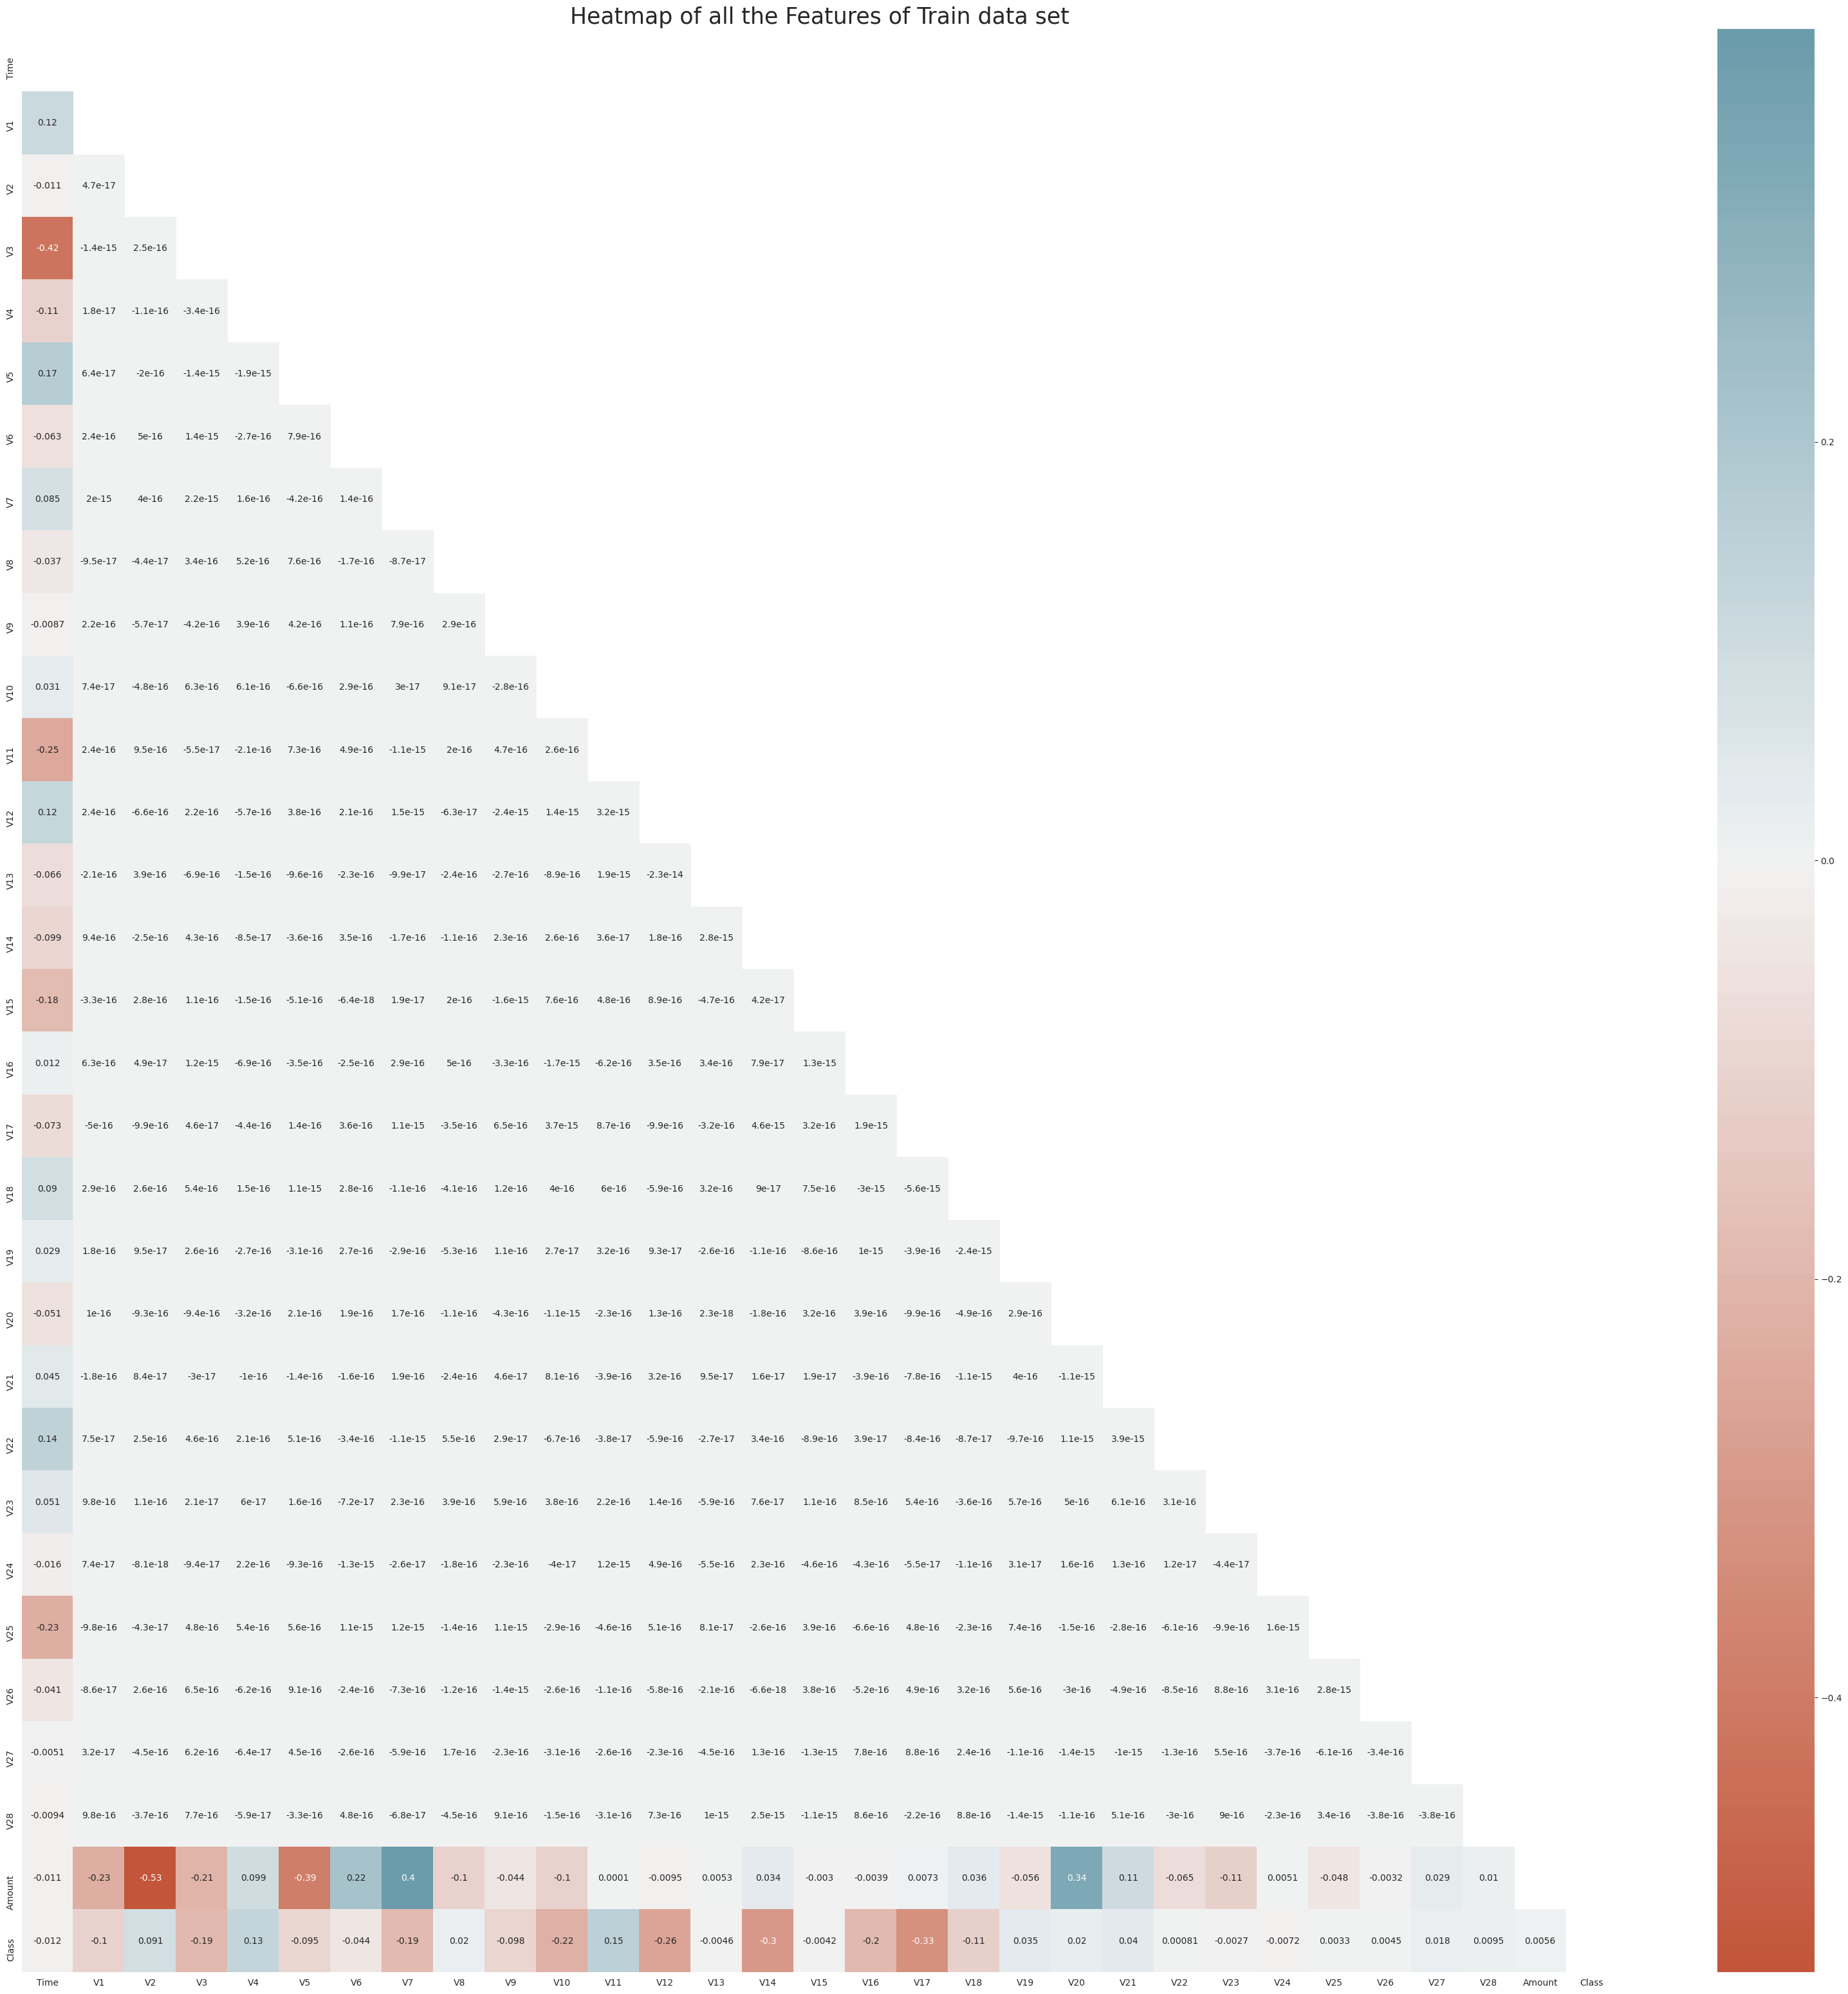

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (40,40))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [ ]:
def plotgraph(x,y,field):
  plt.plot(x[y==0][field],'.',color='black')
  plt.plot(x[y==1][field],'.',color='orange')
  plt.ylabel(field)
  plt.xlabel('index')
  plt.legend(labels=['Not Fraud', 'Fraud'])
  plt.show()

In [ ]:
def plotgraphlog(x,y,field):
  plt.plot(np.log10(x[y==0][field].apply(lambda x: max(x,0.001))),'.',color='black')
  plt.plot(np.log10(x[y==1][field].apply(lambda x: max(x,0.001))),'.',color='orange')
  plt.ylabel(field)
  plt.xlabel('index')
  plt.legend(labels=['Not Fraud', 'Fraud'])
  plt.show()

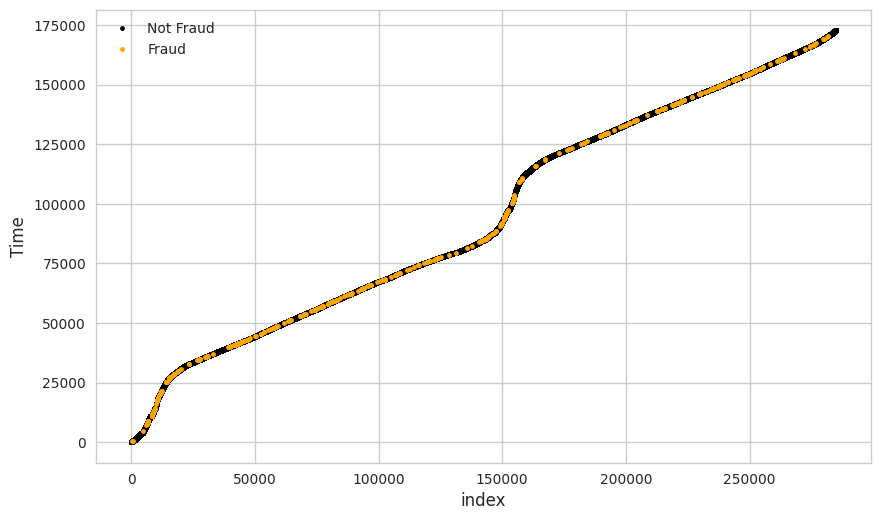

In [ ]:
plotgraph(X,Y,'Time')

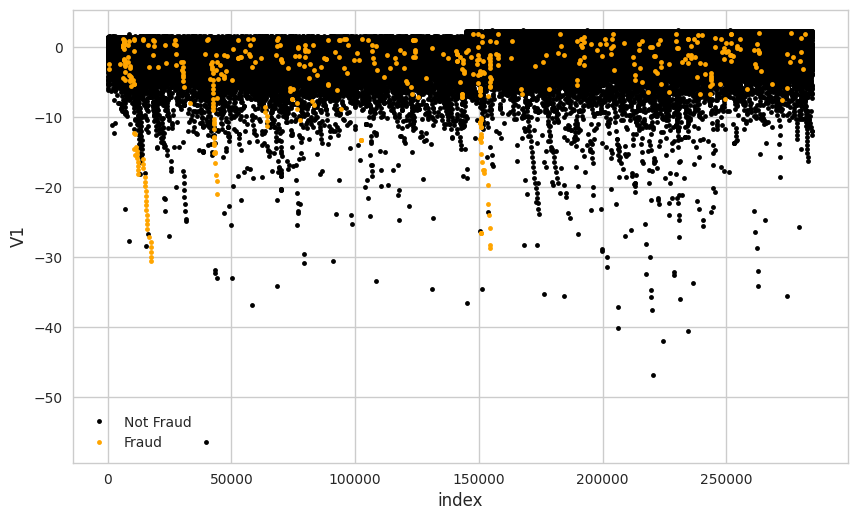

In [ ]:
plotgraph(X,Y,'V1')

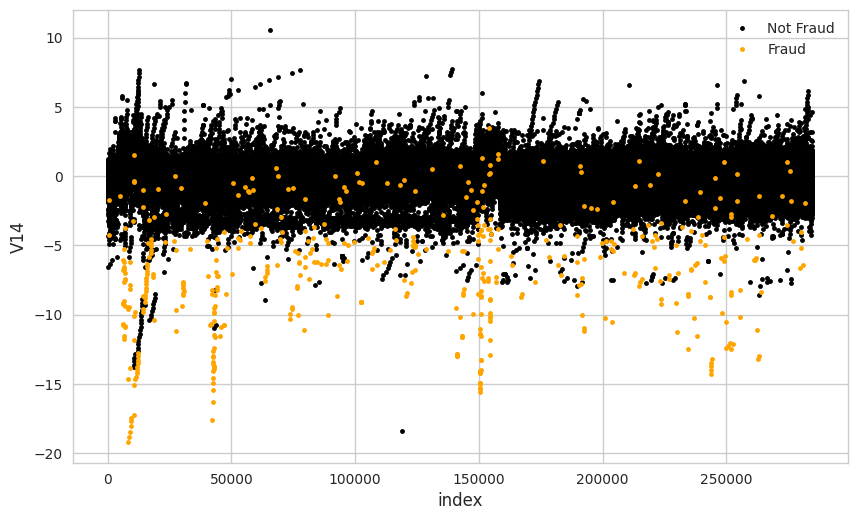

In [ ]:
plotgraph(X,Y,'V14')

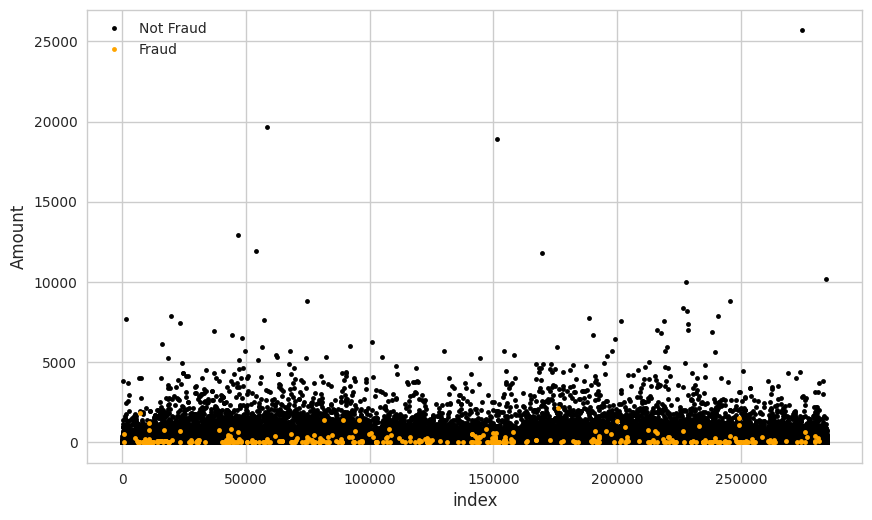

In [ ]:
plotgraph(X,Y,'Amount')

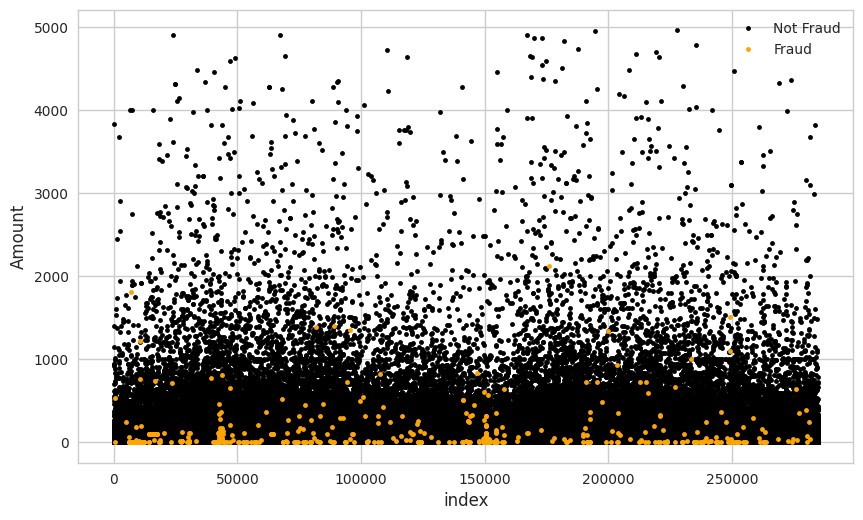

In [ ]:
plotgraph(X[X['Amount']<5000],Y,'Amount')

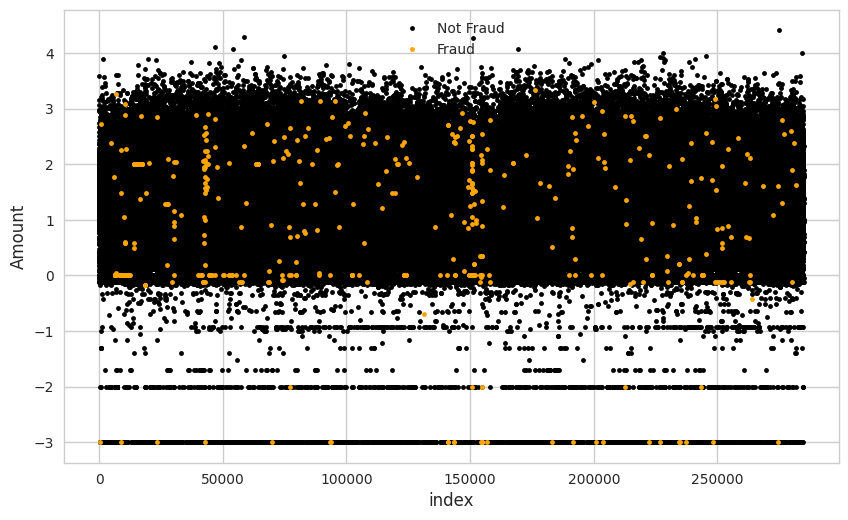

In [ ]:
plotgraphlog(X,Y,'Amount')

## Bivariate Analysis

In [ ]:
def plotgraph2(x,y,field0,field1,options=None):
  plt.plot(x[y==0][field0],x[y==0][field1],'.',color="black")
  plt.plot(x[y==1][field0],x[y==1][field1],'.',color="orange")
  plt.ylabel(field1)
  plt.xlabel(field0)
  plt.legend(labels=['Not Fraud', 'Fraud'])
  plt.show()

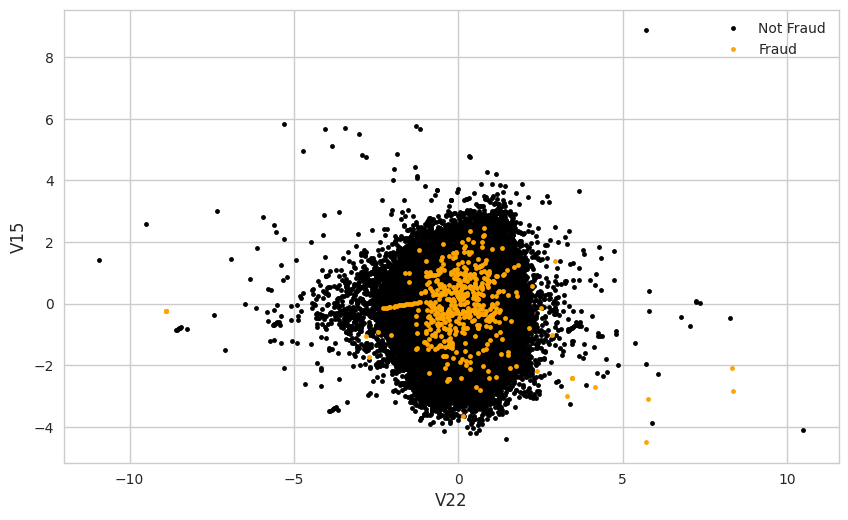

In [ ]:
plotgraph2(X,Y,'V22','V15')

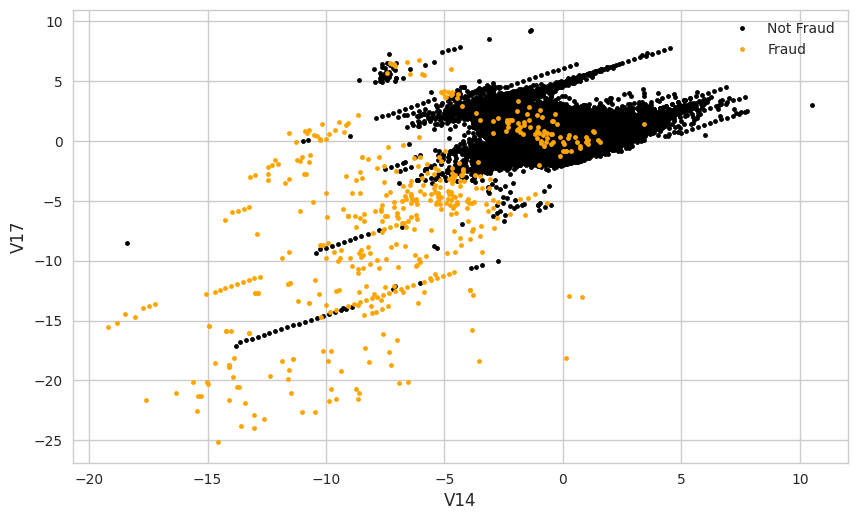

In [ ]:
plotgraph2(X,Y,'V14','V17')

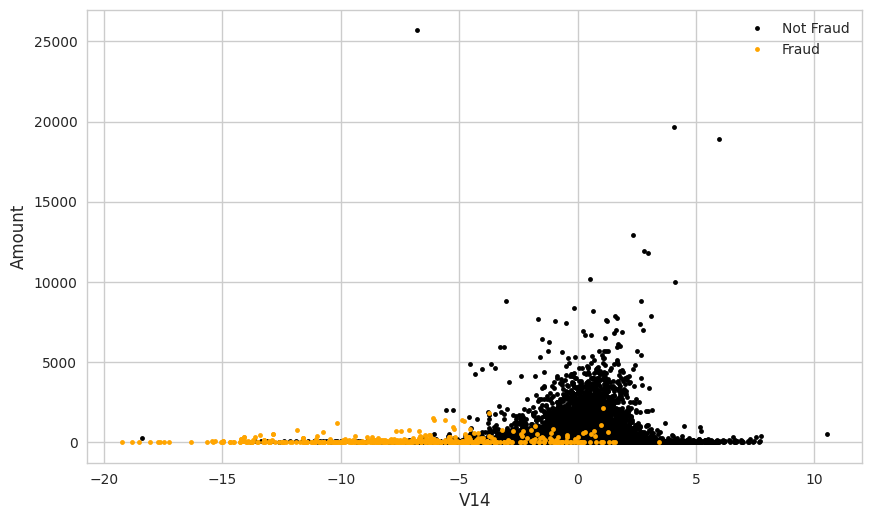

In [ ]:
plotgraph2(X,Y,'V14','Amount')

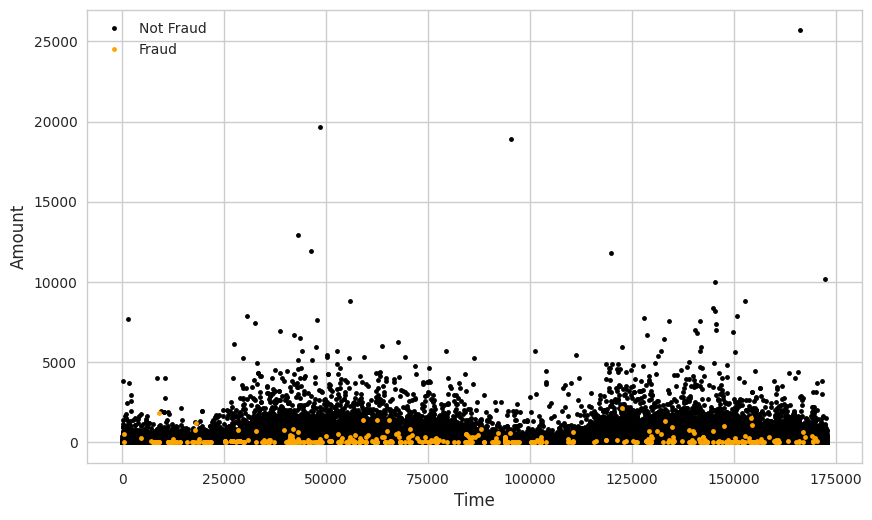

In [ ]:
plotgraph2(X,Y,'Time','Amount')

# Optimize Data 

## Scale Data

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [ ]:
# From source : "V1, V2 ,V3, ...." column data has already been scaled.
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Split Data

In [ ]:
# split x,y
def splitxy(data):
    X=data.drop('Class', axis=1)
    y=data['Class']
    return X, y

X,y = splitxy(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Correlation Check

In [ ]:
# Create train_df for correlation check
temp1 = pd.DataFrame(X_train,columns=list(X.columns))
temp2 = pd.DataFrame(y_train,columns=['Class'])
train_df = pd.concat([temp1, temp2], axis=1)
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


Text(0.5, 1.0, 'Data')

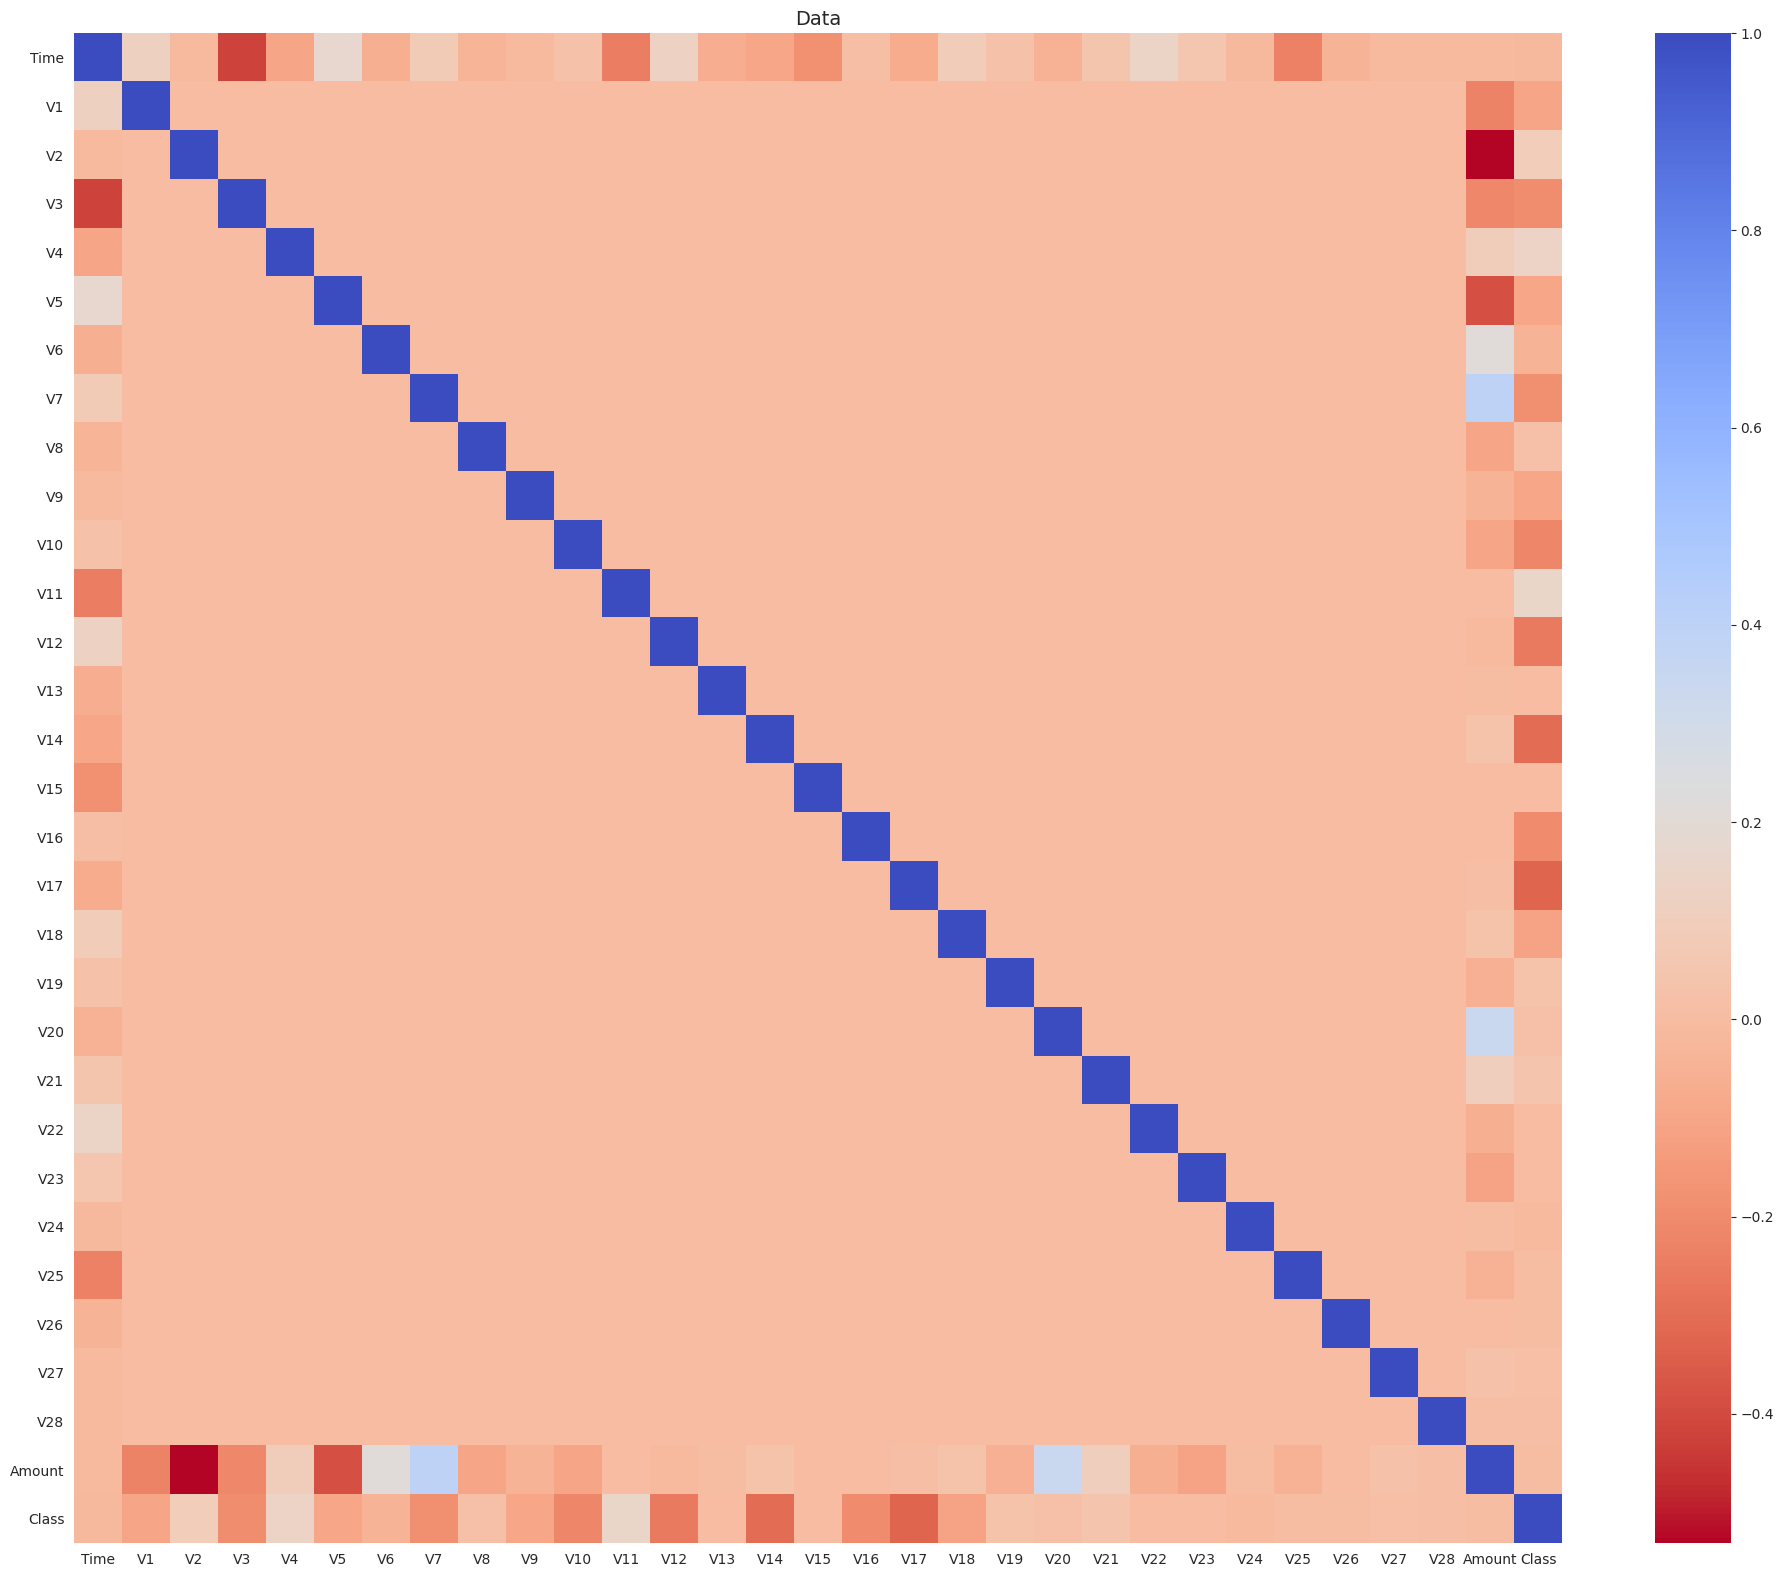

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Data", fontsize=14)

In [ ]:
abscorr = abs(corr['Class'])
abscorr.mean()

0.1193403570628676

In [ ]:
print(abscorr[abscorr>0.12].index)

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class'], dtype='object')


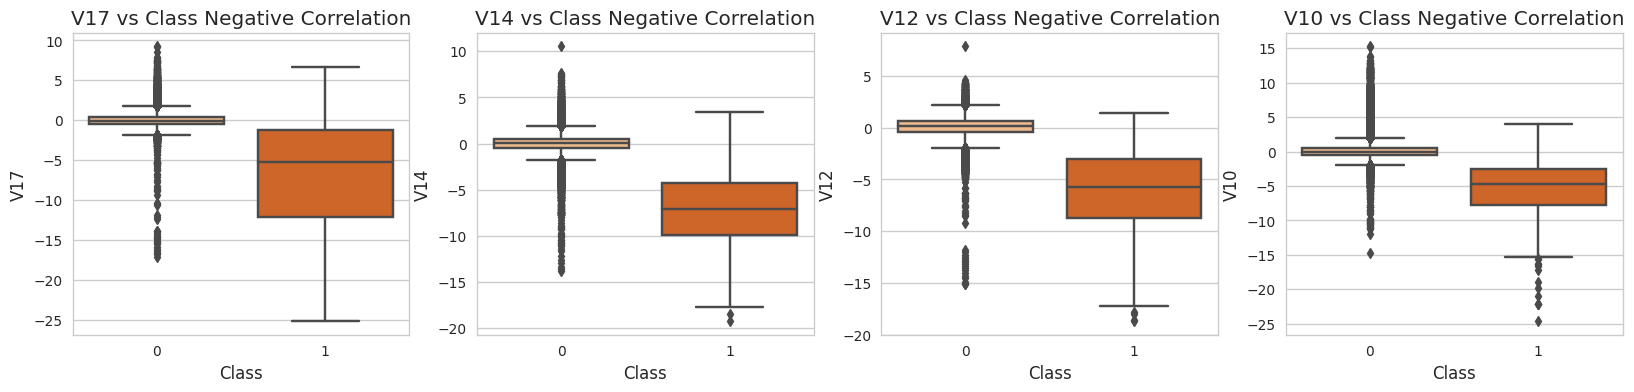

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=train_df, palette="Oranges", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=train_df, palette="Oranges", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=train_df, palette="Oranges", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V17", data=train_df, palette="Oranges", ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

plt.show()

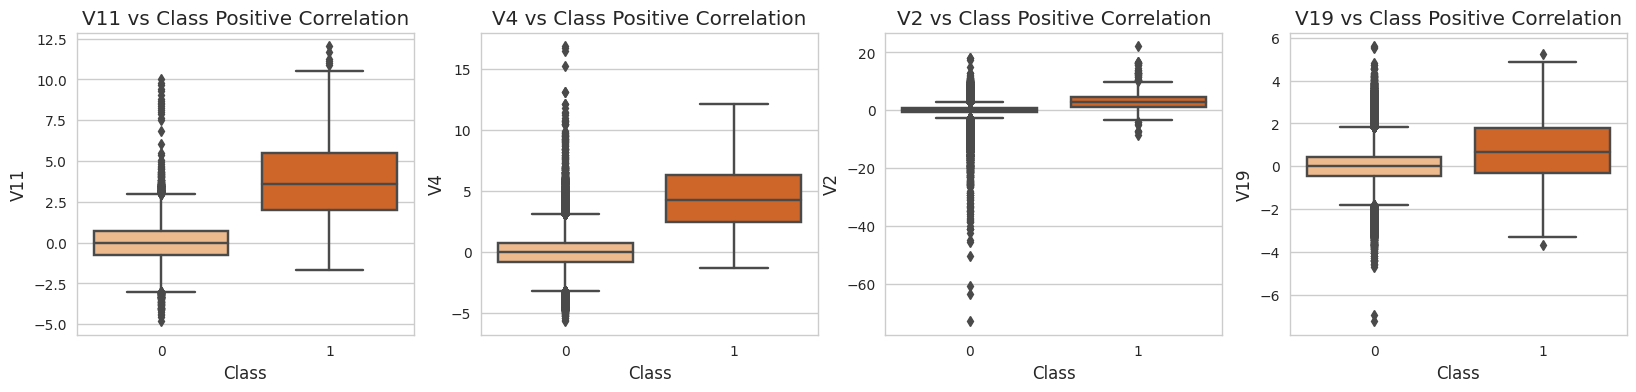

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=train_df, palette='Oranges', ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=train_df, palette='Oranges', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=train_df, palette='Oranges', ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=train_df, palette='Oranges', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Remove Outlier 

Interquartile Range (IQR)
คือการแบ่งการระจายตัวนั้นออกมาเป็น 4 ช่วง โดยการนำ data ทั้งหมดมาเรียงกันจากน้อยไปหามากและ mark จุดที่  25% , 50% , 75% , 100% ของจำนวนสมาชิกทั้งหมด ตามลำดับ ในที่นี้เราสนใจที่ค่า 25% และ 75% เป็นหลัก เราจะนำทั้งสองจุดมาลบกันเพื่อให้ได้ค่า IQR ดังรูป

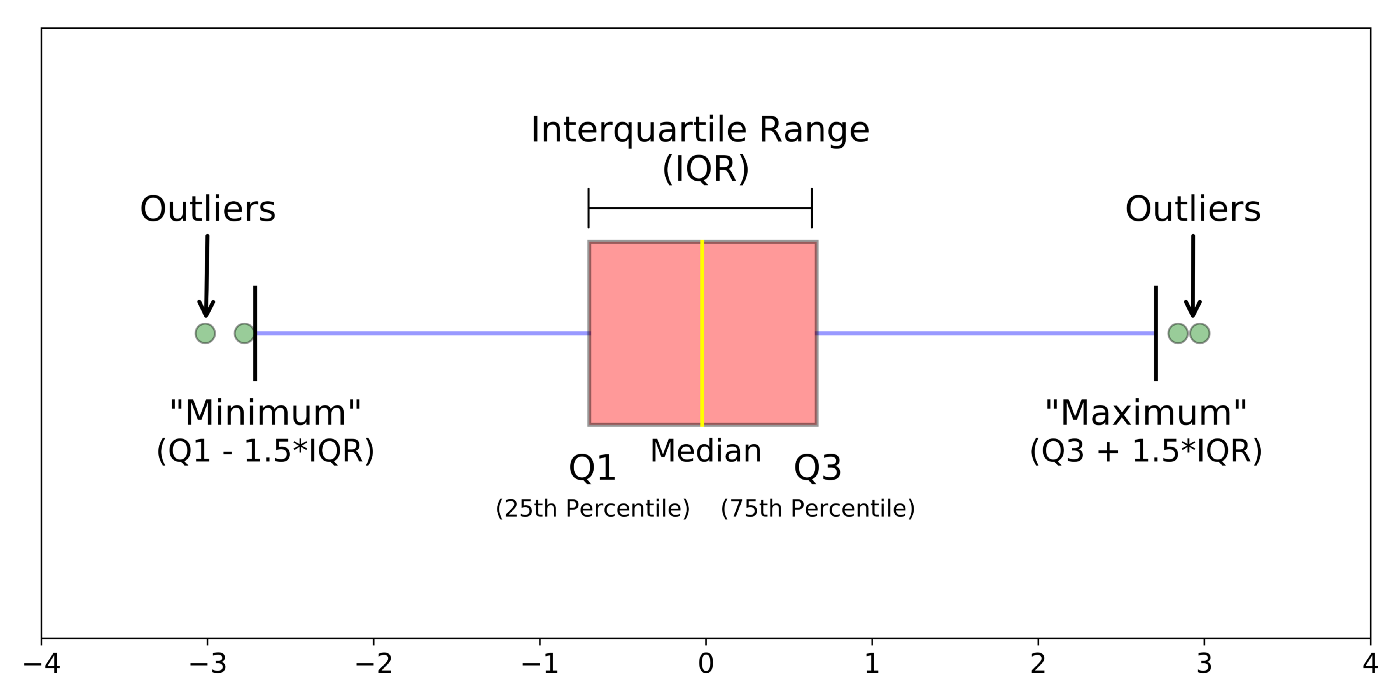

In [ ]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,0.689153,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.167819,0
165061,0.381595,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0.333962,0
238186,0.762145,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.139873,0
150562,0.105476,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,1.333613,0
138452,-0.023931,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0.052540,0


In [ ]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time      1.000294
V1        2.235466
V2        1.401869
V3        1.916185
V4        1.590900
V5        1.299975
V6        1.164629
V7        1.122795
V8        0.535935
V9        1.241427
V10       0.986789
V11       1.503438
V12       1.024690
V13       1.309209
V14       0.920059
V15       1.229628
V16       0.991308
V17       0.884778
V18       0.999565
V19       0.914151
V20       0.344986
V21       0.414810
V22       1.070217
V23       0.309498
V24       0.794676
V25       0.668288
V26       0.568289
V27       0.162360
V28       0.131444
Amount    0.999092
Class     0.000000
dtype: float64


In [ ]:
test = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(test.shape)

(117188, 31)



**Isolation Forest**

Text(0.5, 1.0, 'Histogram of Avg Anomaly Scores: Lower => More Anomalous')

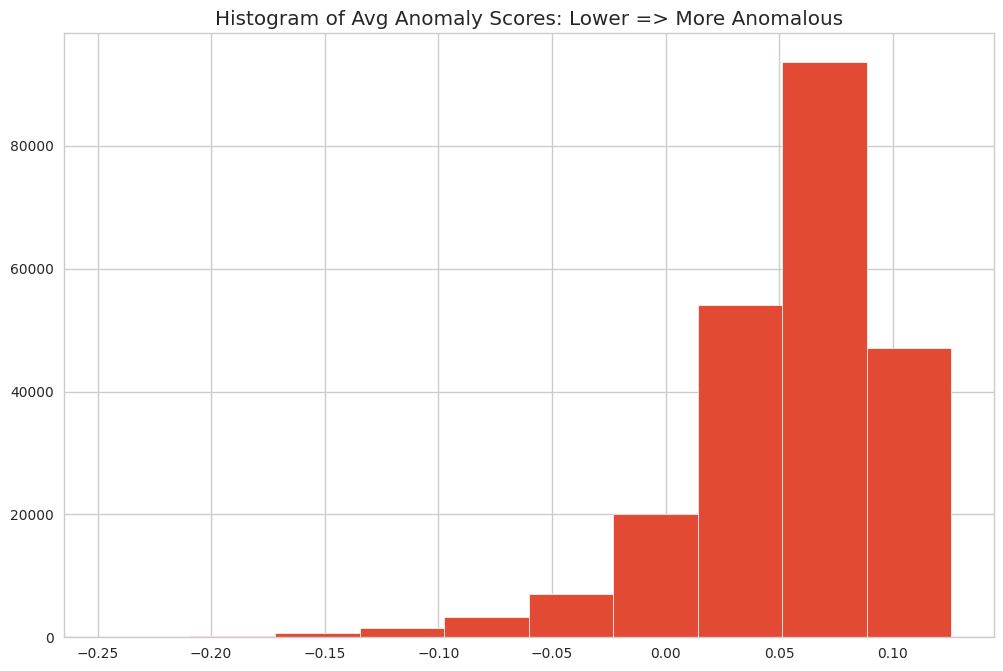

In [ ]:
from sklearn.ensemble import IsolationForest
from collections import Counter
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(train_df)
y_pred_train = clf.predict(train_df)

if_scores = clf.decision_function(train_df)
plt.figure(figsize=(12,8))
plt.hist(if_scores)
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous')

In [ ]:
# LassoCV (Tips to select feature)
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel as sfm
feature_names = list(train_df.columns)

clf = LassoCV().fit(X_train, y_train)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-3]
threshold = importance[idx_third]+0.01
idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)

# sfm.fit(X, y)

[4.61862130e-04 1.90002676e-03 2.88839759e-03 5.11595433e-03
 3.79673934e-03 2.28702982e-03 1.66212576e-03 6.88525711e-03
 8.03022449e-04 3.63115459e-03 8.11239627e-03 6.25071390e-03
 1.08458139e-02 1.55844164e-04 1.32877995e-02 2.35899769e-04
 9.28875059e-03 1.59615848e-02 5.54138592e-03 1.86761947e-03
 2.36379313e-04 1.91486083e-03 2.62030126e-04 6.25019540e-05
 5.11998881e-04 2.13584010e-04 3.58206791e-04 1.59571222e-03
 1.04943320e-03 5.12837339e-04]
Selected features: ['V17' 'V14' 'V12' 'V16' 'V10' 'V7' 'V11' 'V18' 'V3' 'V4' 'V9' 'V2' 'V5'
 'V21' 'V1' 'V19' 'V6' 'V27' 'V28' 'V8']


# Machine Learning (Unsupervised)

## PCA

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
X,Y = splitxy(df)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.32620555, 0.08638223])

In [ ]:
X_tt = pca.transform(X)
X_dt = pca.inverse_transform(X_tt)
X_dt = pd.DataFrame(X_dt, columns=X.columns, index=X.index)

In [ ]:
X['MSE'] = MSE(X, X_dt)

In [ ]:
threshold = X.MSE.quantile(0.99)

In [ ]:
X['fraud'] = X['MSE'].apply(lambda x: 1 if x > threshold else 0)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,MSE,fraud
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0.482649,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0.234329,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,1.125788,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0.617796,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0.399748,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,11.769650,1
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0.648917,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,1.070064,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0.836686,0


In [ ]:
X[['fraud']].value_counts()

fraud
0        281958
1          2849
dtype: int64

In [ ]:
print(classification_report(Y,X.fraud))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.11      0.63      0.19       492

    accuracy                           0.99    284807
   macro avg       0.55      0.81      0.59    284807
weighted avg       1.00      0.99      0.99    284807



## KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
X,Y = splitxy(df)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

AttributeError: ignored

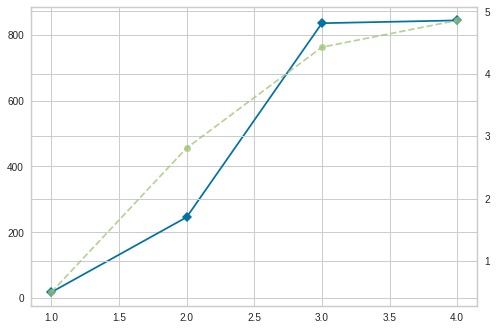

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
X.shape

(284807, 2)

In [ ]:
newdf = pd.DataFrame(X,columns=['X','Y'])

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
group = kmeans.fit_predict(newdf)

In [ ]:
newdf['group'] = group 
newdf

,X,Y,group
0,0.944740,1.379157,0
1,-1.367745,-0.962224,0
2,4.502193,0.791212,0
3,0.592194,0.976283,0
4,-0.292395,1.392396,0
...,...,...,...
284802,-1.513712,13.118250,0
284803,-0.941364,0.873387,0
284804,-0.390918,-2.038169,0
284805,-1.161846,0.403025,0


In [ ]:
centroid_df = pd.DataFrame({'centroidX':kmeans.cluster_centers_[:, 0] , 'centroidY': kmeans.cluster_centers_[:, 1], 'group':range(0,3)})
centroid_df

,centroidX,centroidY,group
0,-0.559763,-0.003832,0
1,9.980085,0.076598,1
2,48.914516,0.178611,2


In [ ]:
newdf = newdf.merge(centroid_df,how='left',on='group')

In [ ]:
newdf['diffX'] = newdf.X-newdf.centroidX
newdf['diffY'] = newdf.Y-newdf.centroidY
newdf['distance'] = np.hypot(newdf.diffX,newdf.diffY)
newdf

,X,Y,group,centroidX,centroidY,diffX,diffY,distance
0,0.944740,1.379157,0,-0.559763,-0.003832,1.504503,1.382989,2.043572
1,-1.367745,-0.962224,0,-0.559763,-0.003832,-0.807982,-0.958391,1.253534
2,4.502193,0.791212,0,-0.559763,-0.003832,5.061956,0.795044,5.124011
3,0.592194,0.976283,0,-0.559763,-0.003832,1.151957,0.980115,1.512491
4,-0.292395,1.392396,0,-0.559763,-0.003832,0.267368,1.396229,1.421598
...,...,...,...,...,...,...,...,...
284802,-1.513712,13.118250,0,-0.559763,-0.003832,-0.953949,13.122083,13.156712
284803,-0.941364,0.873387,0,-0.559763,-0.003832,-0.381601,0.877219,0.956626
284804,-0.390918,-2.038169,0,-0.559763,-0.003832,0.168844,-2.034336,2.041331
284805,-1.161846,0.403025,0,-0.559763,-0.003832,-0.602083,0.406858,0.726662


In [ ]:
threshold = 0.99

In [ ]:
thresholdvalue0 = newdf.loc[newdf.group == 0]['distance'].quantile(threshold)
thresholdvalue1 = newdf.loc[newdf.group == 1]['distance'].quantile(threshold)
thresholdvalue2 = newdf.loc[newdf.group == 2]['distance'].quantile(threshold)

In [ ]:
newdf['fraud'] = ""

In [ ]:
newdf.fraud[newdf['group']== 0]= newdf.distance[newdf['group']== 0].apply(lambda x: 'fraud' if x > thresholdvalue0 else 'notfraud')
newdf.fraud[newdf['group']== 1] = newdf.distance[newdf['group']== 1].apply(lambda x: 'fraud' if x > thresholdvalue1 else 'notfraud')
newdf.fraud[newdf['group']== 2] = newdf.distance[newdf['group']== 2].apply(lambda x: 'fraud' if x > thresholdvalue2 else 'notfraud')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
newdf.loc[newdf['fraud'] == 'fraud', 'fraudnum'] = 1
newdf.loc[newdf['fraud'] == 'notfraud', 'fraudnum'] = 0

In [ ]:
print(classification_report(Y,newdf.fraudnum))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.04      0.25      0.07       492

    accuracy                           0.99    284807
   macro avg       0.52      0.62      0.53    284807
weighted avg       1.00      0.99      0.99    284807



# Machine Learning (Supervised)

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
X,Y = splitxy(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Classifier Libraries

import matplotlib.pyplot as plt

In [ ]:
accuracies ={}
f1scores={}

In [ ]:
def Models(models, Xtrain, Xtest, ytrain, ytest, title):
  # train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
  # test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
  # matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
  model = models
  model.fit(Xtrain,ytrain)
  X,y = splitxy(df)
  cm=confusion_matrix(ytest,model.predict(Xtest))
  
  f = plt.figure(figsize=(5, 5))    
  g1 = sns.heatmap(cm, annot=True, fmt=".1f", cbar=False)
  g1.set_title(f"{title} model")
  g1.set_ylabel('Actual'.format(ytrain.sum()), fontsize=14, rotation=90)
  g1.set_xlabel('Predicted')
  plt.show()
  
  accuracy = accuracy_score(ytest,model.predict(Xtest))*100
  print(f'Accuracy : {accuracy}')

  recall = recall_score(ytest,model.predict(Xtest))*100
  print("recall: ",recall)

  f1=f1_score(ytest,model.predict(Xtest))
  print("F1-Score: ",f1)

  accuracies[title]=accuracy
  f1scores[title]=f1

  # Compute ROC curve and ROC area for each class
  roc = roc_auc_score(ytest,model.predict(Xtest))
  print("ROC: ",roc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


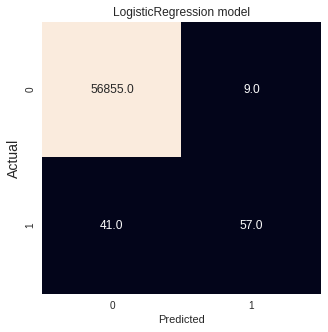

Accuracy : 99.91222218320986
recall:  58.16326530612245
F1-Score:  0.6951219512195121
ROC:  0.7907371903460314


In [ ]:
title = 'LogisticRegression'
Models(LogisticRegression(),X_train, X_test, y_train, y_test, title)

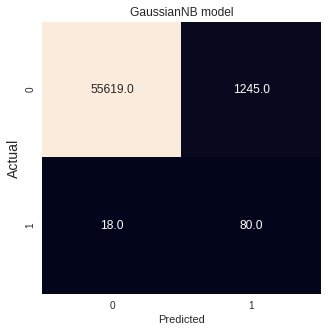

Accuracy : 97.78273234788104
recall:  81.63265306122449
F1-Score:  0.11243851018973998
ROC:  0.8972160931057848


In [ ]:
title = 'GaussianNB'
Models(GaussianNB(),X_train, X_test, y_train, y_test, title)

Accuracy Comparison


In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

F1 Comparison



In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,101,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()), palette=colors)
plt.show()

## *XGBoost*

In [ ]:
accuracies={}
f1scores={}

In [ ]:
# RandomizeSearchCV
# xgb_params = {
#     'learning_rate' : [0.08, 0.06, 0.04, 0.09],      
#     'max_depth': range(1,11),
#     'n_estimators': [100, 200, 300,500,1000]}
# xgb =XGBClassifier()
# xgb_randomcv_model=RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=2, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
# print(xgb_randomcv_model.best_params_)
# print('xgb_randomcv_model accuracy = {}'.format(xgb_randomcv_model.best_score_))

In [ ]:
xgb =XGBClassifier(n_estimators=300, learning_rate=0.09, max_depth=6)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

f1=f1_score(y_test,prediction)*100
print("F1 Score: ",f1)
f1scores['Xgboost Classifier']=f1

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
cm1=confusion_matrix(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('XGBOOST Accuracy Score: {0}'.format(score),size=12)
plt.show()

## Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=200,min_samples_split=11,min_samples_leaf=7, max_features=2,max_depth= 80)
clf.fit(X_train,y_train)

prediction = clf.predict(X_test.values)
acc = accuracy_score(y_test,prediction)*100
print("Random Forest Accuracy:",acc)
accuracies['Random Forest']=acc

f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)
f1scores['Random Forest']=f1

In [ ]:
score=round(accuracy_score(y_test,prediction),3)
print(classification_report(y_test,prediction))
cm1=confusion_matrix(y_test,prediction)
sns.heatmap(cm1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title('Random Forest accuracy_score: {0}'.format(score),size=12)
plt.show()

## SMOTE Cross-Validation

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline


print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
log_reg_params = {"penalty": ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, n_iter=4)

#Cross Validaition
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

#Pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.9MB/s 
     |████████████████████████████████| 1.8MB 7.9MB/s 
     |████████████████████████████████| 245kB 18.9MB/s 
     |████████████████████████████████| 276kB 18.7MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 
     |████████████████████████████████| 65.8MB 46kB/s 
     |████████████████████████████████| 6.8MB 52.4MB/s 
     |████████████████████████████████| 14.2MB 256kB/s 
     |████████████████████████████████| 1.6MB 46.3MB/s 
     |████████████████████████████████| 174kB 50.4MB/s 
     |████████████████████████████████| 157.5MB 92kB/s 
     |████████████████████████████████| 3.1MB 49.9MB/s 
     |████████████████████████████████| 604kB 48.2MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 2.1MB 32.9MB/s 
     |████████████████████████████████| 337kB 44.6MB/s 


In [ ]:
from pycaret.classification import *

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
# split x,y
def splitxy(data):
    X=data.drop('Class', axis=1)
    y=data['Class']
    return X, y

X,y = splitxy(df)

In [ ]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
train_df=pd.concat([X_train,y_train ],axis=1)
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2426,-0.971510,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,2.385072,1.079414,0.190795,-0.853771,-0.712272,-0.206233,-1.253819,-0.075465,-0.179769,1.022453,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,0.326771,-0.122804,-0.223713,0
273831,0.951903,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,-1.138410,0.197037,1.060321,-0.106394,0.303007,1.232100,-0.096319,-0.976058,1.383409,1.353160,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,0.049068,-0.037816,1.380144,0
111538,-0.146007,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,-0.434350,0.807702,-0.392170,-1.428991,-0.074483,2.289323,-0.819121,1.348197,-1.930151,-1.549212,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,0.475727,-0.153728,-0.282401,0
252280,0.834632,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,-0.195908,0.800633,1.657171,1.106952,0.083713,-0.105493,0.453662,-0.938541,0.280581,0.242557,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,-0.040171,0.024283,5.178509,0
281542,1.005181,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,0.239347,-2.414013,-1.031418,-1.406463,-1.274238,-2.150282,0.699747,-0.159559,0.333641,-0.742232,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318,5.054007,0


In [ ]:
test_df=pd.concat([X_test,y_test ],axis=1)
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
225184,0.698410,-0.581460,0.950267,0.115938,-1.384767,1.388364,-1.595678,2.120867,-0.718954,-0.205211,-0.876220,-1.112994,-0.226624,-0.690135,0.292790,-1.224401,-0.561946,-0.703945,-0.556389,-1.079364,-0.292792,0.153480,0.656548,-0.514192,0.077220,0.736220,-0.302469,-0.254862,-0.126279,-0.128275,0
116637,-0.121277,0.686730,-0.785586,0.945092,1.476634,-1.191074,-0.193185,-0.217963,-0.011827,0.727172,-0.257329,-0.672391,0.447294,0.296053,-0.233277,0.635898,0.269020,-0.409906,0.242700,-0.510567,0.388521,0.277960,0.419683,-0.314303,0.427369,0.426733,-0.285560,0.022906,0.079838,3.275204,0
99414,-0.206593,-0.848395,1.214313,0.954869,-0.030145,-0.177527,-0.851855,0.444232,0.369063,-1.005181,-0.331547,1.361922,1.252115,0.793059,0.576994,-0.181782,0.215232,-0.413182,0.216478,0.127922,0.079630,0.205928,0.552455,-0.064845,0.590082,-0.271787,0.276440,0.217840,0.127724,-0.077692,0
217619,0.661110,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,-1.537976,0.692375,0.265751,-0.637888,-1.209966,-1.507076,0.471643,1.056913,1.046626,-0.029761,0.511897,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.151103,0.216899,3.465381,0
279878,0.992293,2.061985,-0.114758,-1.079406,0.427062,-0.229701,-1.241109,0.121975,-0.283331,0.679923,0.100473,-0.889642,-0.046489,-0.855226,0.458457,0.139972,-0.064822,-0.232407,-0.760068,0.149122,-0.284520,-0.299538,-0.772333,0.352777,0.021161,-0.330437,0.198512,-0.076625,-0.061905,-0.289387,0


In [ ]:
reg = setup(data=train_df,target='Class', session_id=123)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(199364, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# best_specific = compare_models(include = ['lr','rf','knn','dt'])
best_specific = compare_models(include = ['lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9991,0.9755,0.6312,0.8546,0.7229,0.7225,0.7324,1.646


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9752,0.6154,0.8889,0.7273,0.7269,0.7392
1,0.9991,0.9804,0.6667,0.8182,0.7347,0.7342,0.7381
2,0.9988,0.9883,0.5185,0.7778,0.6222,0.6216,0.6345
3,0.9991,0.9997,0.7037,0.8261,0.7600,0.7596,0.7620
4,0.9993,0.9742,0.6538,0.9444,0.7727,0.7724,0.7855
5,0.9992,0.9956,0.6538,0.8947,0.7556,0.7552,0.7645
6,0.9992,0.9595,0.6923,0.8571,0.7660,0.7656,0.7700
7,0.9987,0.9826,0.5769,0.6818,0.6250,0.6244,0.6265
8,0.9992,0.9395,0.6923,0.8571,0.7660,0.7656,0.7700
9,0.9991,0.9599,0.5385,1.0000,0.7000,0.6996,0.7335


In [ ]:
tuned_lr = tune_model(lr, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9749,0.6154,0.8889,0.7273,0.7269,0.7392
1,0.9991,0.9805,0.6667,0.8182,0.7347,0.7342,0.7381
2,0.9988,0.9881,0.5185,0.7778,0.6222,0.6216,0.6345
3,0.9991,0.9996,0.7037,0.8261,0.7600,0.7596,0.7620
4,0.9993,0.9739,0.6538,0.9444,0.7727,0.7724,0.7855
5,0.9992,0.9957,0.6538,0.8947,0.7556,0.7552,0.7645
6,0.9992,0.9596,0.6923,0.8571,0.7660,0.7656,0.7700
7,0.9987,0.9826,0.5769,0.6818,0.6250,0.6244,0.6265
8,0.9992,0.9378,0.6923,0.8571,0.7660,0.7656,0.7700
9,0.9991,0.9594,0.5385,1.0000,0.7000,0.6996,0.7335


Learning Curve

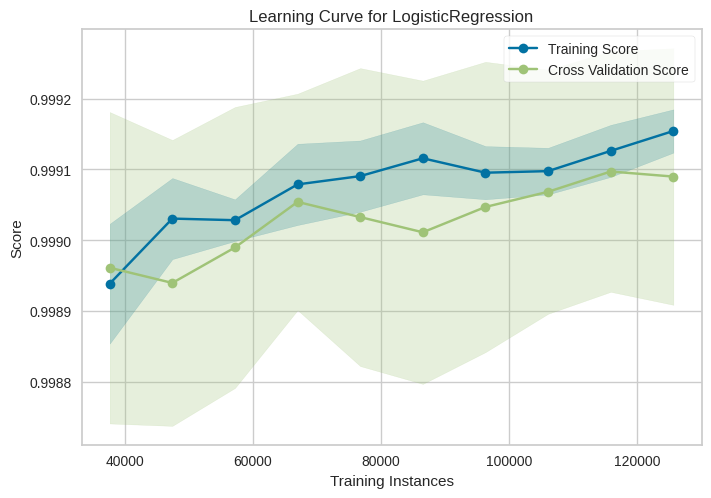

In [ ]:
plot_model(lr,plot='learning')

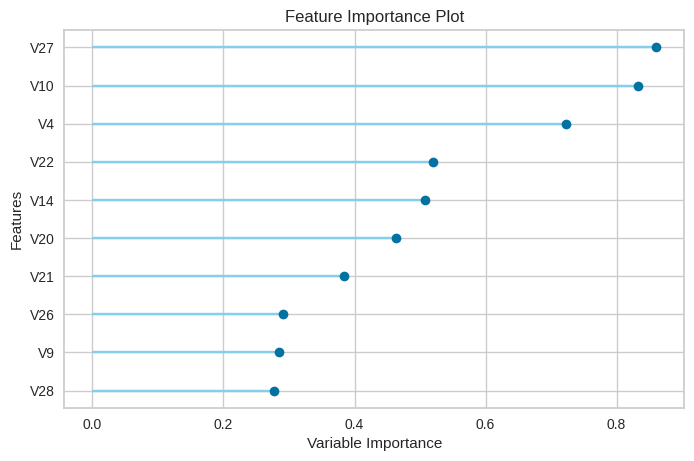

In [ ]:
plot_model(lr,plot='feature')

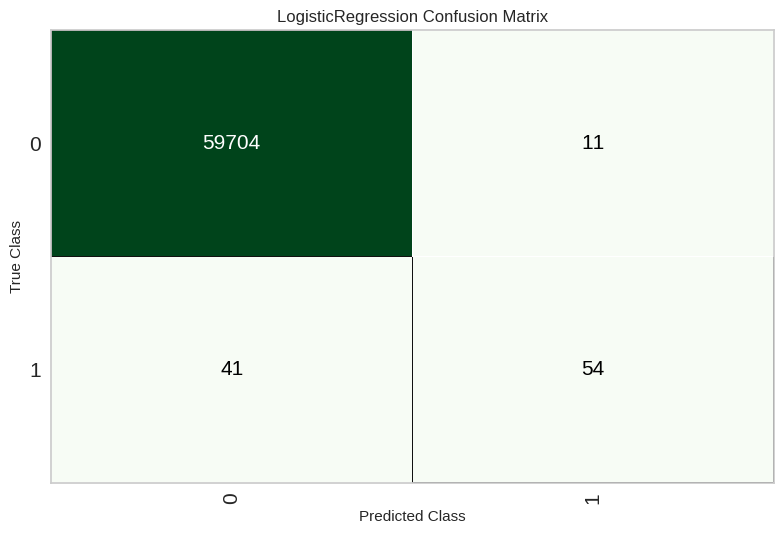

In [ ]:
plot_model(lr,plot='confusion_matrix')

In [ ]:
predictions = predict_model(lr, data=train_df )
predictions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
2426,-0.971510,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,2.385072,1.079414,0.190795,-0.853771,-0.712272,-0.206233,-1.253819,-0.075465,-0.179769,1.022453,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,0.326771,-0.122804,-0.223713,0,0,1.0000
273831,0.951903,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,-1.138410,0.197037,1.060321,-0.106394,0.303007,1.232100,-0.096319,-0.976058,1.383409,1.353160,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,0.049068,-0.037816,1.380144,0,0,0.9999
111538,-0.146007,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,-0.434350,0.807702,-0.392170,-1.428991,-0.074483,2.289323,-0.819121,1.348197,-1.930151,-1.549212,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,0.475727,-0.153728,-0.282401,0,0,0.9998
252280,0.834632,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,-0.195908,0.800633,1.657171,1.106952,0.083713,-0.105493,0.453662,-0.938541,0.280581,0.242557,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,-0.040171,0.024283,5.178509,0,0,0.9998
281542,1.005181,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,0.239347,-2.414013,-1.031418,-1.406463,-1.274238,-2.150282,0.699747,-0.159559,0.333641,-0.742232,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318,5.054007,0,0,0.9953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,-0.555411,1.256867,0.413152,0.322996,0.685660,-0.299566,-1.054102,0.141748,-0.249886,-0.090195,-0.306468,0.072227,0.665936,1.036084,-0.448733,1.005042,0.440469,-0.051501,-0.398653,-0.203949,-0.028844,-0.278275,-0.763534,0.119647,0.367553,0.243484,0.091687,-0.017777,0.032565,-0.282401,0,0,0.9997
84434,-0.286528,-1.093034,1.621979,1.334661,0.818556,-0.181152,-0.660391,0.597445,0.157340,-1.014495,-0.407656,-0.454624,0.392683,0.886625,0.408923,1.033171,-0.270605,-0.015873,0.026312,0.516262,-0.052241,0.168755,0.318385,-0.346367,0.427942,0.537712,-0.221692,-0.309258,0.001913,-0.062880,0,0,0.9995
95816,-0.225708,-0.799005,0.205982,1.512178,0.128515,-0.861328,0.635684,-0.432034,0.758099,0.452072,-0.930030,-1.437812,-0.134925,-0.614330,-0.100408,0.342841,-0.571876,0.799367,-0.446101,1.420343,0.117807,-0.042553,-0.139181,0.160084,-0.409871,-0.655866,1.078683,-0.021430,0.050234,0.747013,0,0,0.9995
203245,0.587895,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,0.013327,0.694155,1.685742,0.978553,0.260383,-0.852009,-0.204911,-0.667519,-0.197015,0.668118,-0.149817,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.009090,-0.061492,-0.131070,0,0,0.9998


In [ ]:
predictions['Score'].mean()

0.9992776935642201

Text(0.5, 1.0, 'Score')

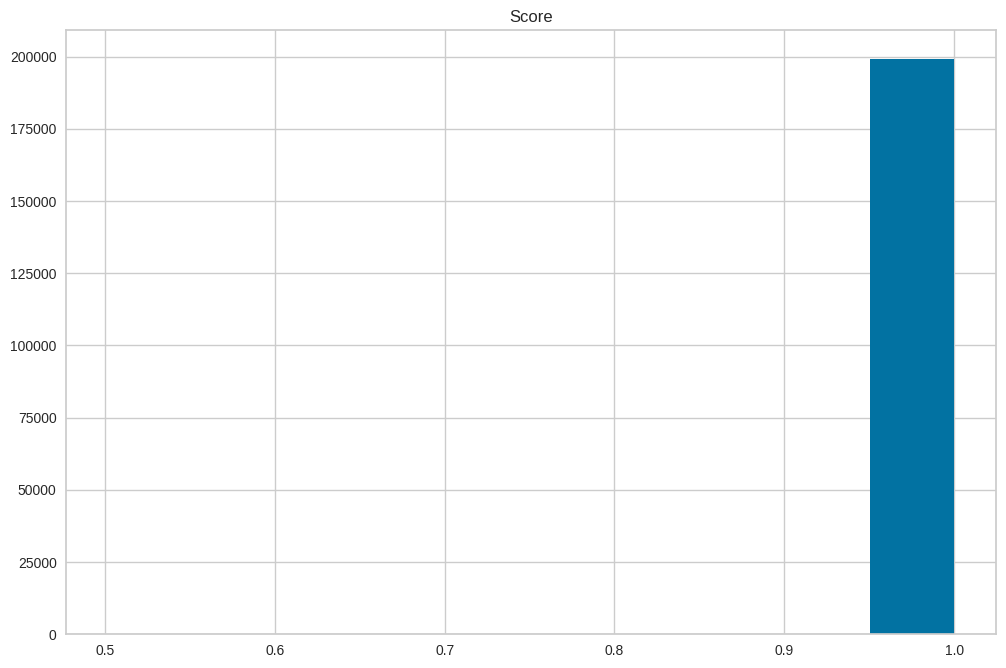

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(predictions['Score'])
plt.title('Score')

**Try Clustering**

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
# Split train test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2)

In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
print(train_df.shape)
print(test_df.shape)

(227845, 31)
(56962, 31)


In [ ]:
from pycaret.clustering import *

In [ ]:
reg = setup(data=df)

,Description,Value
0,session_id,1116
1,Original Data,"(284807, 31)"
2,Missing Values,False
3,Numeric Features,30
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(284807, 32)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1104,38667.191,1.8384,0,0,0


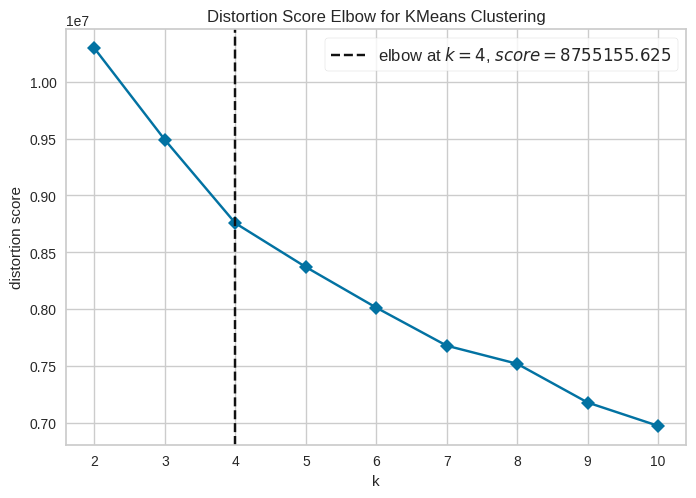

In [ ]:
plot_model(kmeans,plot = 'elbow')